In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

JAK_INHIBITORS = False

data_dir = "../data/09182025_IF_scan"
if_data_files = ["Cell.csv"]

columns = ["WellId", "CircTotalIntenCh2", "CircTotalIntenCh3"]

column_to_stain = dict(zip(range(1,13), ["pSTAT"]*6 + ["tSTAT"] * 6))
column_to_stain = dict(zip(range(1,13), ["pSTAT"]*12))
column_to_stain = dict(zip(range(1,13), ["Fedra"]*6 + ["Filgo"]*6))

row_to_patient = {
	"A":813,
	"B":813,
	"C":826,
	"D":826,
	"E":904,
	"F":905,
	"G":905,
	#"H":617
}	

column_to_t_pts = {
	1:"0",
	2:"0",
	3:"0.01",
	4:"0.1",
	5:"0.33",
	6:"1",
	7:"0",
	8:"0",
	9:"0.1",
	10:"0.33",
	11:"1",
	12:"3.33"
}

row_to_replicate = {
	"A":1,
	"B":2,
	"C":1,
	"D":2,
	"E":1,
	"F":1,
	"G":2,
	#"H":1    
}
if JAK_INHIBITORS:
	column_to_row = {
		"A":"Control",
		"B":"Control",
		"C":"0.01nM Fedratinib",
		"D":"0.1nM Fedratinib",
		"E":"0.33nM Fedratinib",
		"F":"10nM Fedratinib",
		"G":"1nM Filgotinib",
		"H":"10nM Filgotinib"
	}


  WellId  Row  Column  ValidObjectCount
0    A01    1       1               482
1    A02    1       2               810
2    A03    1       3               746
3    A04    1       4               831
4    A05    1       5               732


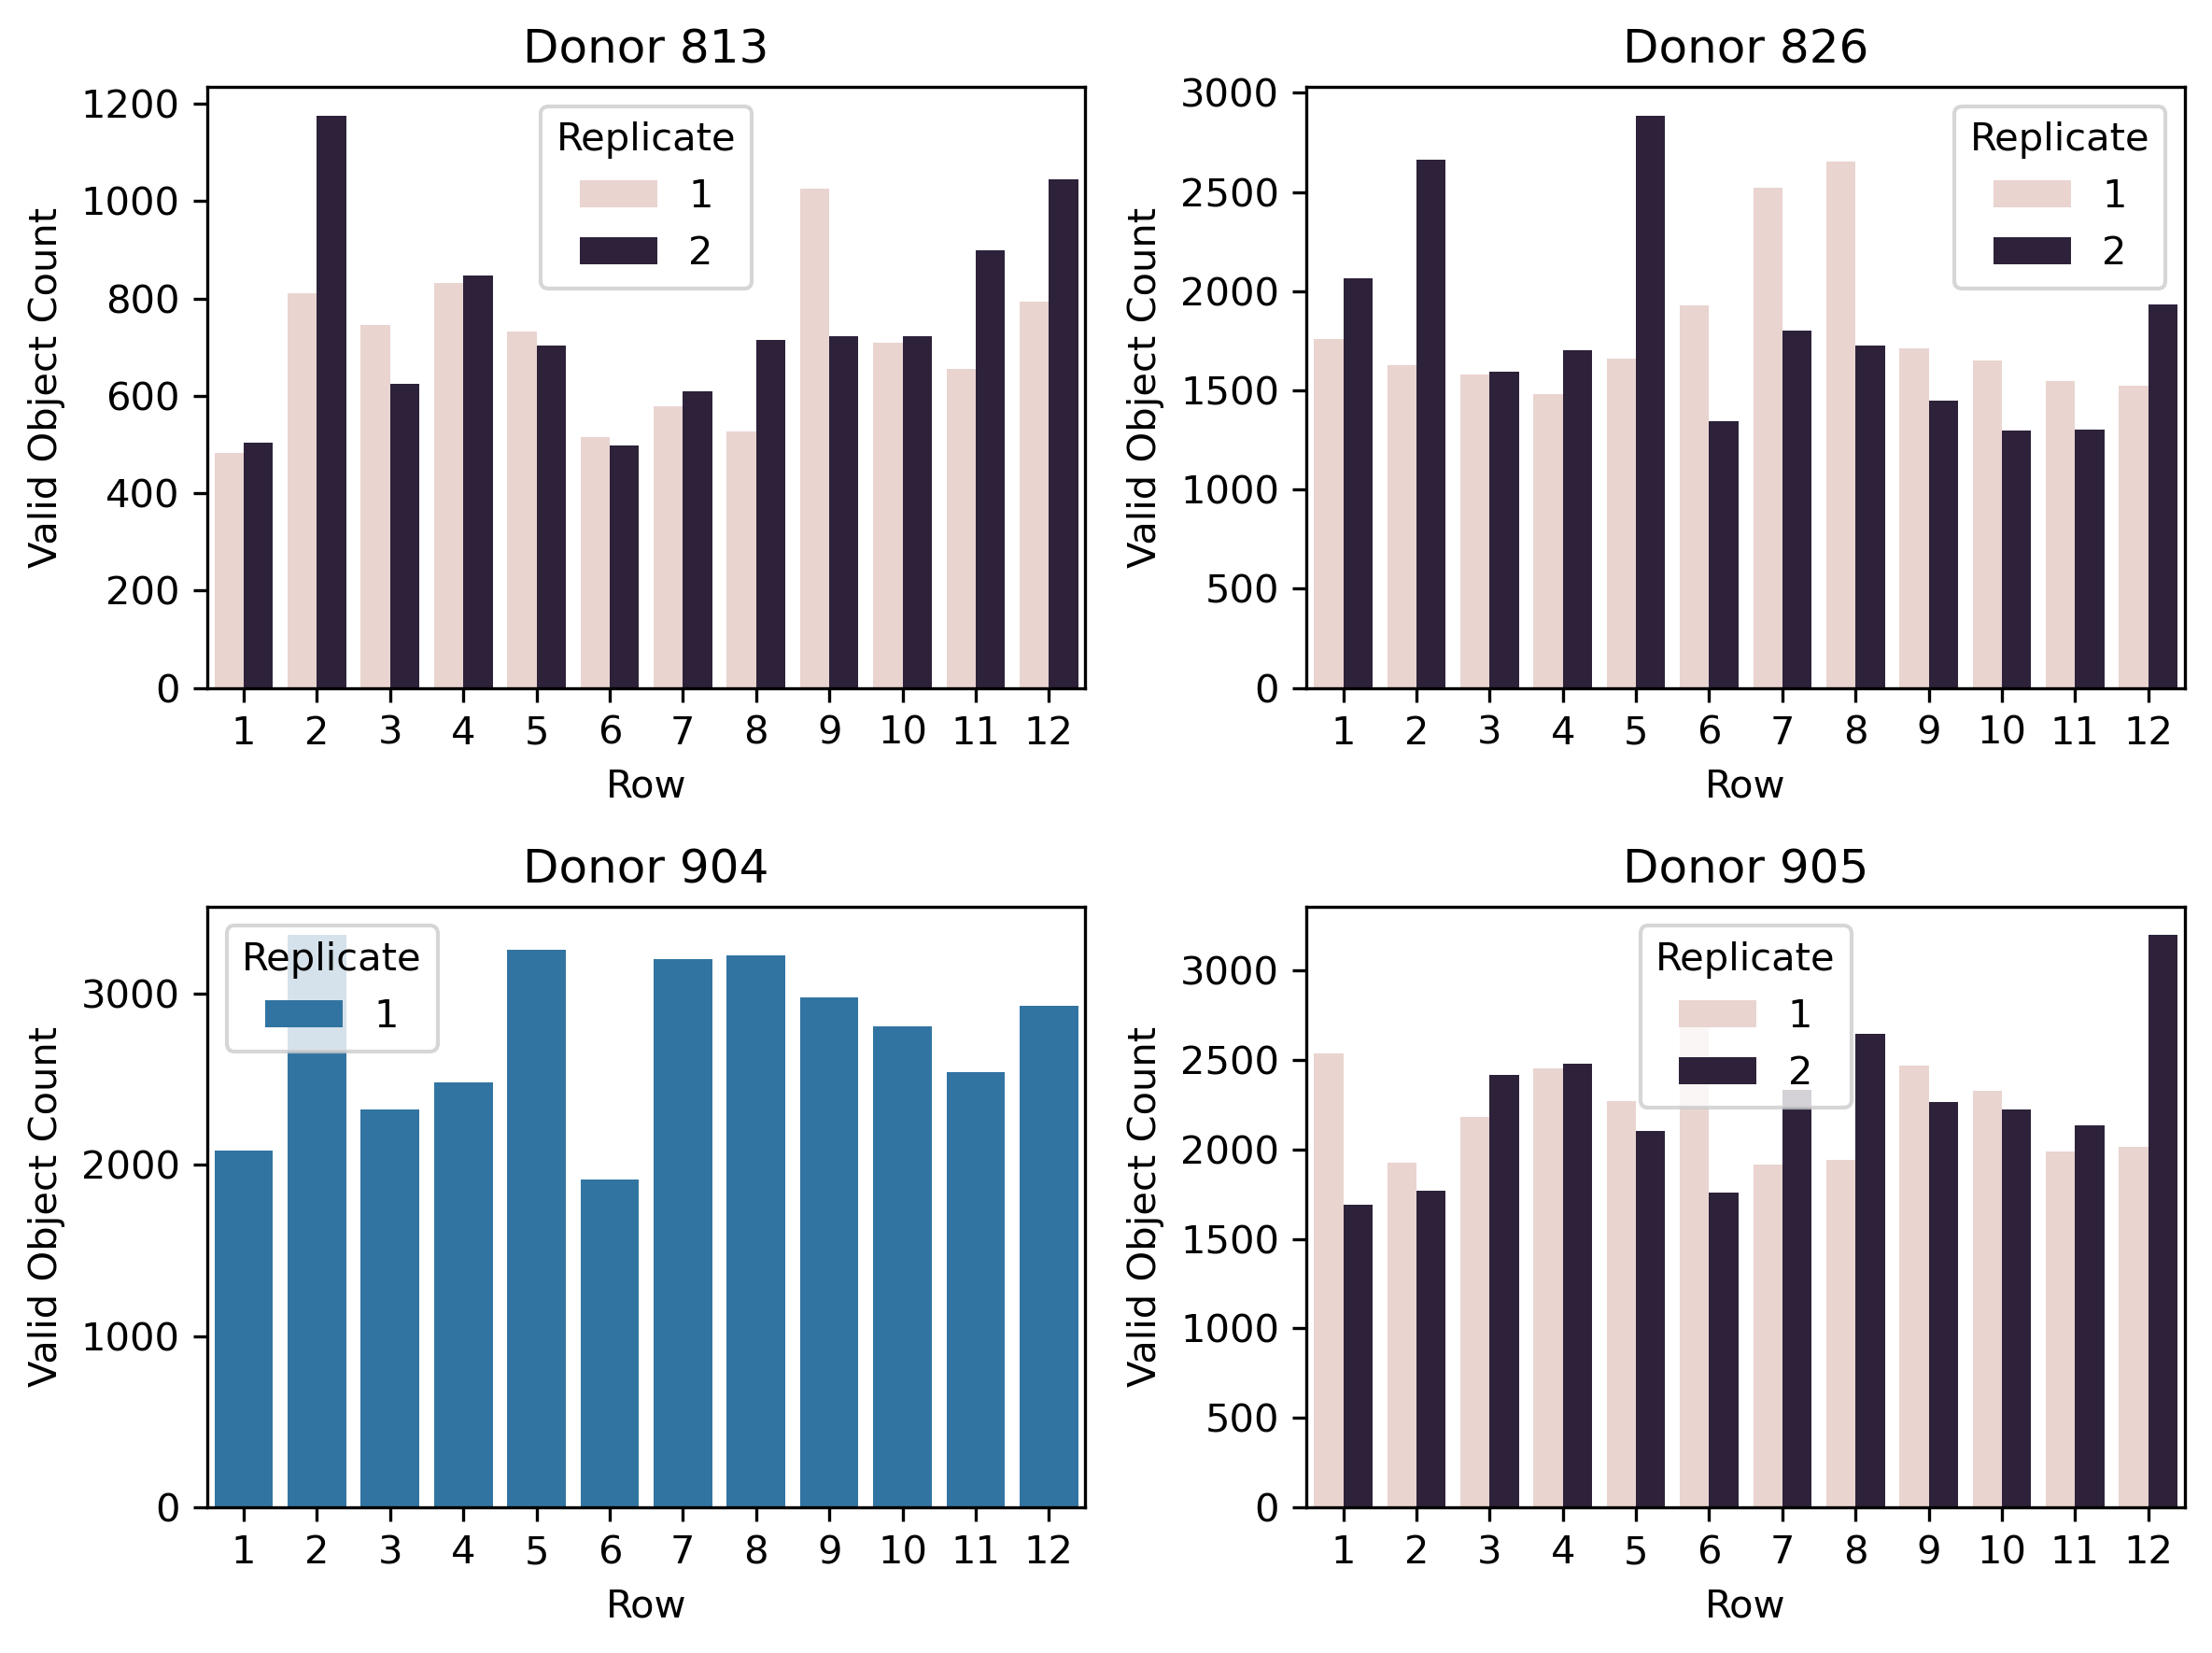

In [93]:
import string
alpha_dict = dict(zip(range(1,27), string.ascii_uppercase))
full_fname = f"{data_dir}/Well.csv"
select_cols = ["WellId", "Row", "Column", "ValidObjectCount"]
df = pd.read_csv(full_fname, usecols=select_cols)
print(df.head())
df["PatientId"] = [row_to_patient[alpha_dict[x]] for x in df["Row"]]
df["Replicate"] = [row_to_replicate[alpha_dict[x]] for x in df["Row"]]

fig = plt.figure(figsize=(8,6), dpi=300)
for i,pat in enumerate(df["PatientId"].unique()):
   ax = fig.add_subplot(2,2,i+1)
   select_df = df[df["PatientId"] == pat]
   sns.barplot(x="Column", y="ValidObjectCount", hue="Replicate", data=select_df, ax=ax)
   ax.set_title(f"Donor {pat}")
   ax.set_xlabel("Row");
   ax.set_ylabel("Valid Object Count");
   ax.legend(title="Replicate")
plt.tight_layout(); 

In [ ]:
dfs = []
for fname in if_data_files:
	full_fname = f"{data_dir}/{fname}"
	df = pd.read_csv(full_fname, usecols=columns)

	stat1_means = df.groupby("WellId")["CircTotalIntenCh2"].mean()
	stat1_sems = df.groupby("WellId")["CircTotalIntenCh2"].std()
	stat3_means = df.groupby("WellId")["CircTotalIntenCh3"].mean()
	stat3_sems = df.groupby("WellId")["CircTotalIntenCh3"].std()

	stat_df = pd.concat([stat1_means, stat1_sems, stat3_means, stat3_sems], axis=1)
	stat_df.columns = ["STAT1 Mean", "STAT1 SEM", "STAT3 Mean", "STAT3 SEM"]
	stat_df.index = [x.strip() for x in stat_df.index]
	# Assign various characteristics based on wells using the dictionaries above
	rows = [x.strip()[0] for x in stat_df.index.values]
	cols = [int(x.strip()[1:]) for x in stat_df.index.values]
	stat_df["STAT"] = [column_to_stain[x] for x in cols]
	stat_df["PatientId"] = [row_to_patient[x] for x in rows]
	stat_df["IL-6 Concentration"] = ["10 ng/mL" for x in cols]
	stat_df["Time"] = [column_to_t_pts[x] for x in cols]
	stat_df["Replicate"] = [row_to_replicate[x] for x in rows]
	if JAK_INHIBITORS:
		stat_df["JAK Inhibitor"] = [drug_to_row[x] for x in rows]
		stat_df["Column"] = cols
		stat_df.loc[[f"C0{i}" for i in [3,4,5,6]], "JAK Inhibitor"] = "1nM Fedratinib"
		stat_df.loc[[f"C{i:02d}" for i in [7,8,9,10]], "JAK Inhibitor"] = "10nM Fedratinib"
	stat_df["Date"] = data_dir.split("/")[-1]
	display(stat_df)
	stat_df.to_csv(f"{data_dir.split('/')[-1]}.csv")
	dfs.append(stat_df)

,STAT1 Mean,STAT1 SEM,STAT3 Mean,STAT3 SEM,STAT,PatientId,IL-6 Concentration,Time,Replicate,Date
A01,6.711064e+06,4.439236e+06,5.685091e+06,4.951131e+06,Fedra,813,10 ng/mL,0,1,09182025_IF_scan
A02,1.109546e+07,7.689880e+06,9.948857e+06,7.642550e+06,Fedra,813,10 ng/mL,0,1,09182025_IF_scan
A03,7.014542e+06,5.746078e+06,6.598611e+06,7.106622e+06,Fedra,813,10 ng/mL,0.01,1,09182025_IF_scan
A04,4.724635e+06,2.397067e+06,2.721295e+06,2.312430e+06,Fedra,813,10 ng/mL,0.1,1,09182025_IF_scan
A05,4.370846e+06,2.381619e+06,1.896867e+06,1.355133e+06,Fedra,813,10 ng/mL,0.33,1,09182025_IF_scan
...,...,...,...,...,...,...,...,...,...,...
G08,5.079500e+06,1.368897e+06,3.582928e+06,1.464147e+06,Filgo,905,10 ng/mL,0,2,09182025_IF_scan
G09,8.883229e+06,4.878974e+06,8.709493e+06,5.243161e+06,Filgo,905,10 ng/mL,0.1,2,09182025_IF_scan
G10,6.329932e+06,2.623769e+06,6.331410e+06,4.265574e+06,Filgo,905,10 ng/mL,0.33,2,09182025_IF_scan
G11,5.215255e+06,1.619471e+06,2.971685e+06,1.740052e+06,Filgo,905,10 ng/mL,1,2,09182025_IF_scan


Text(0.5, 0.98, 'Patient 905')

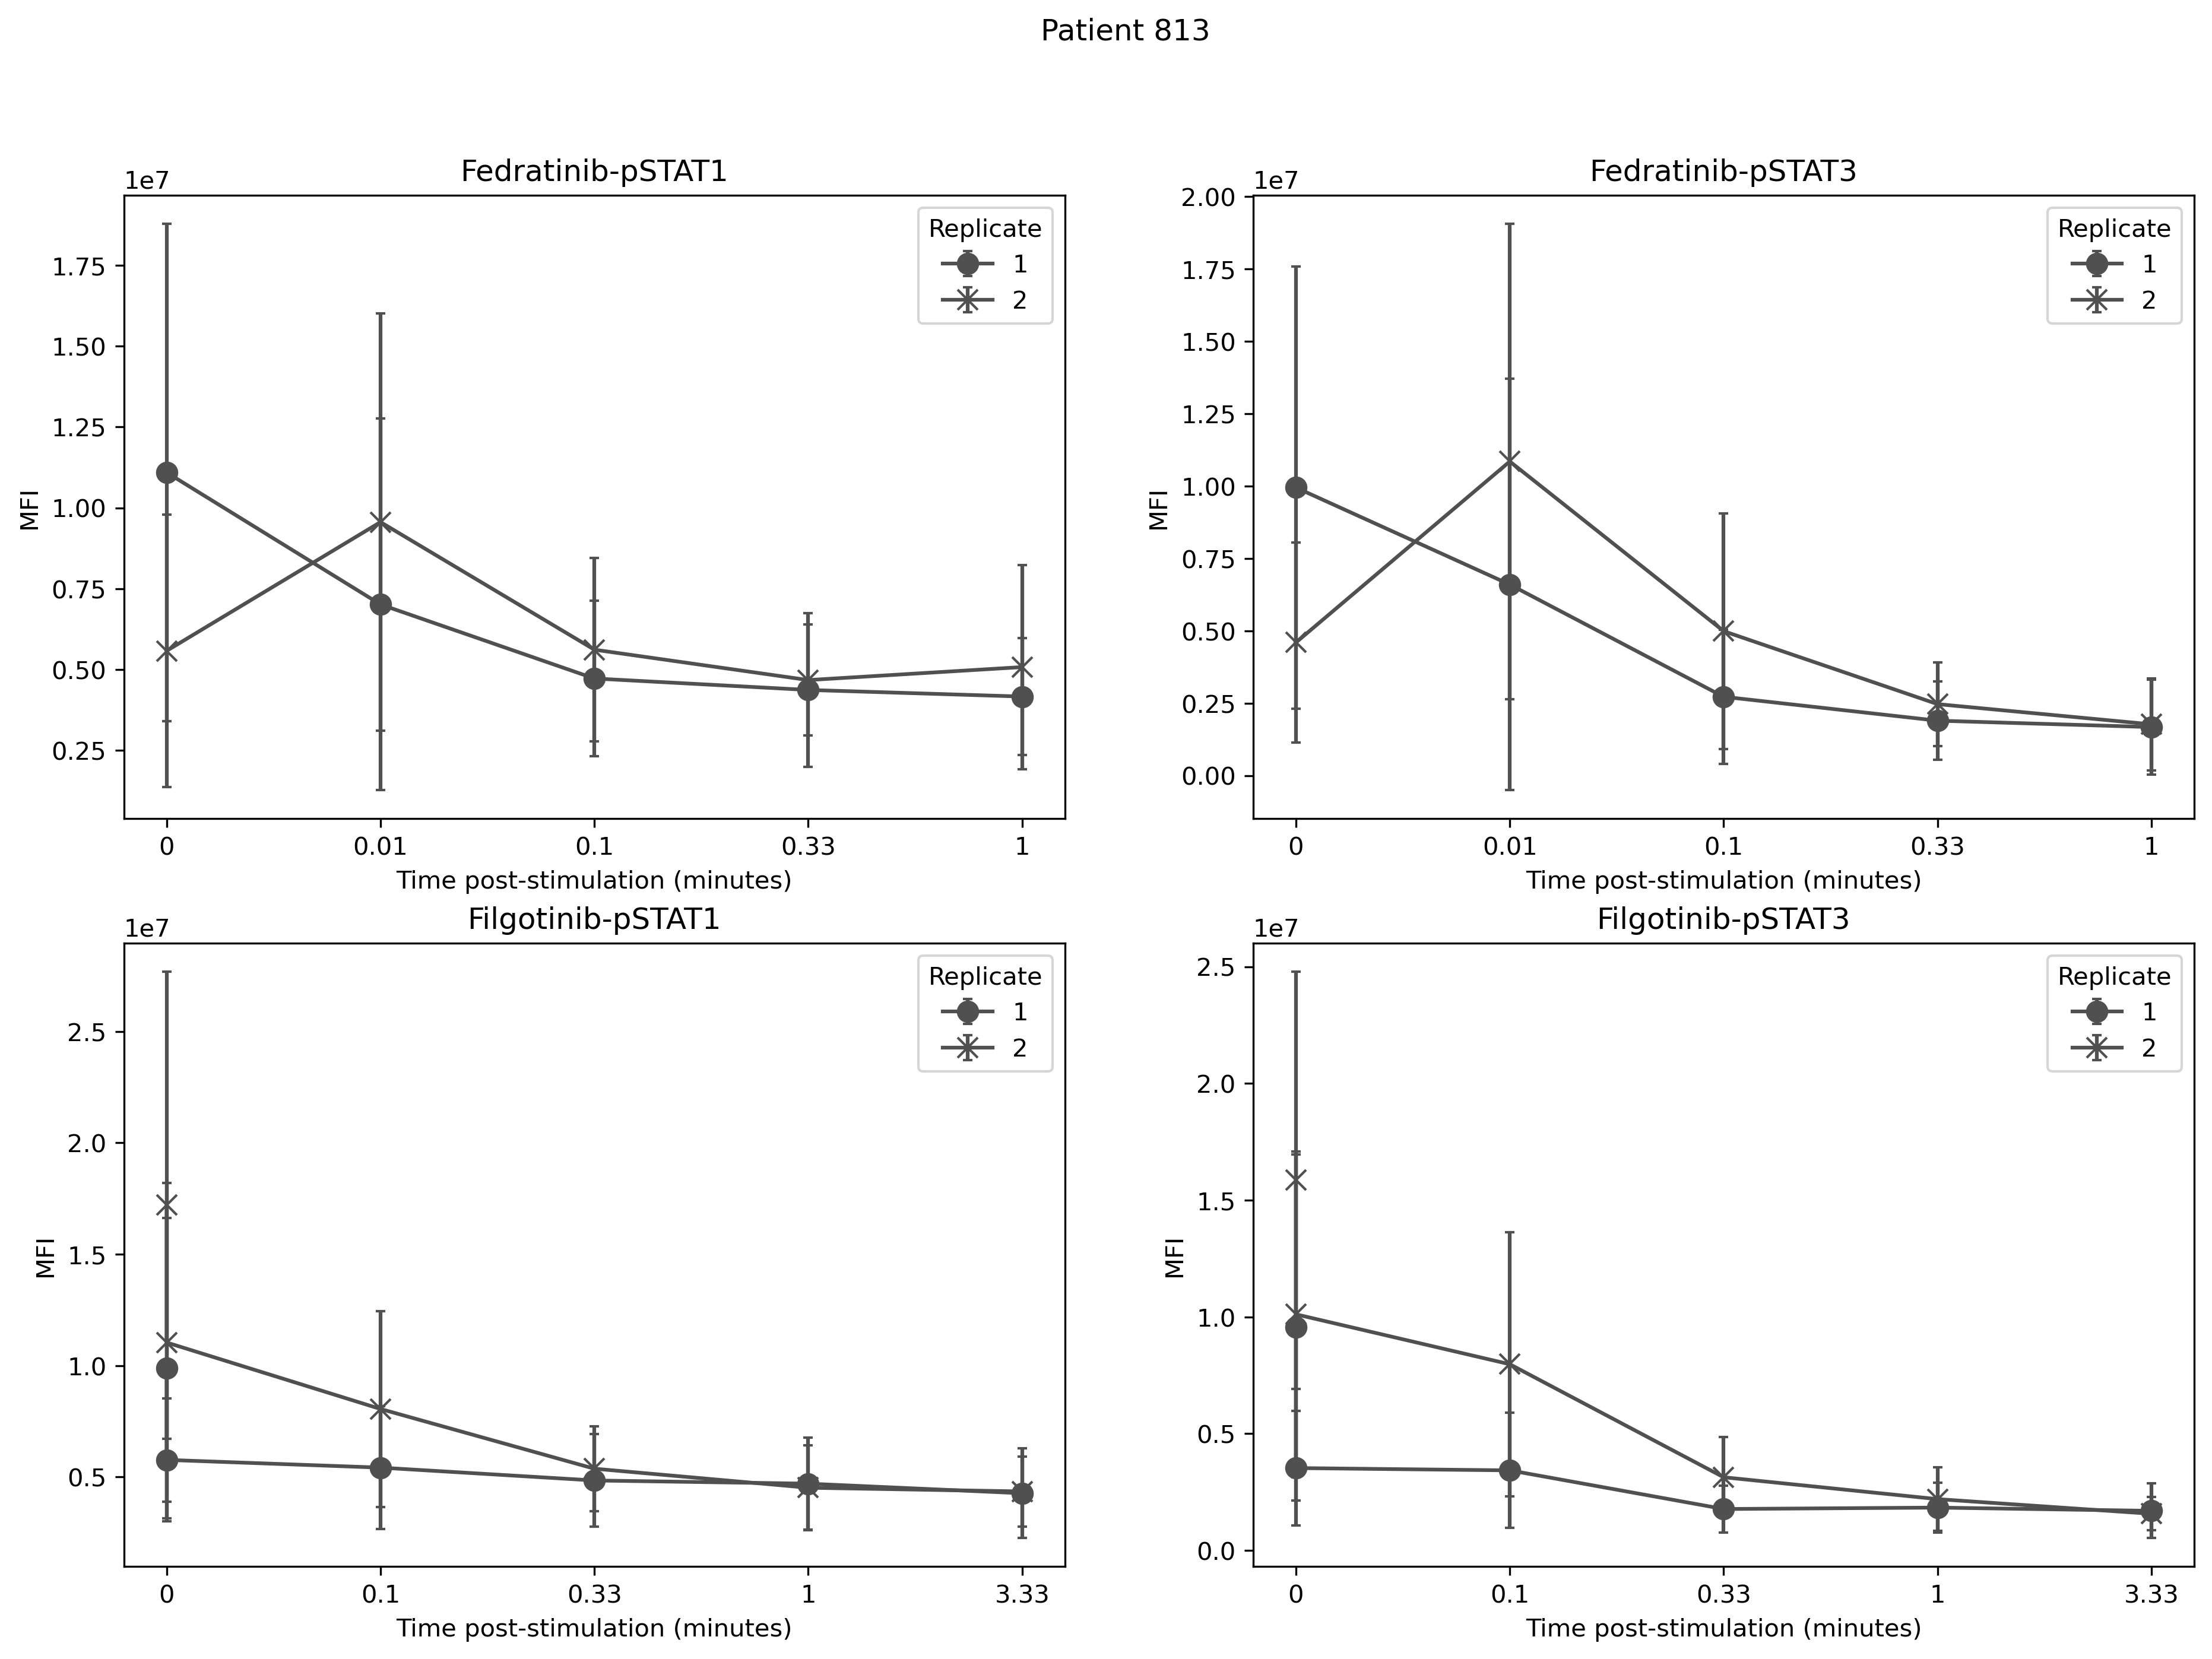

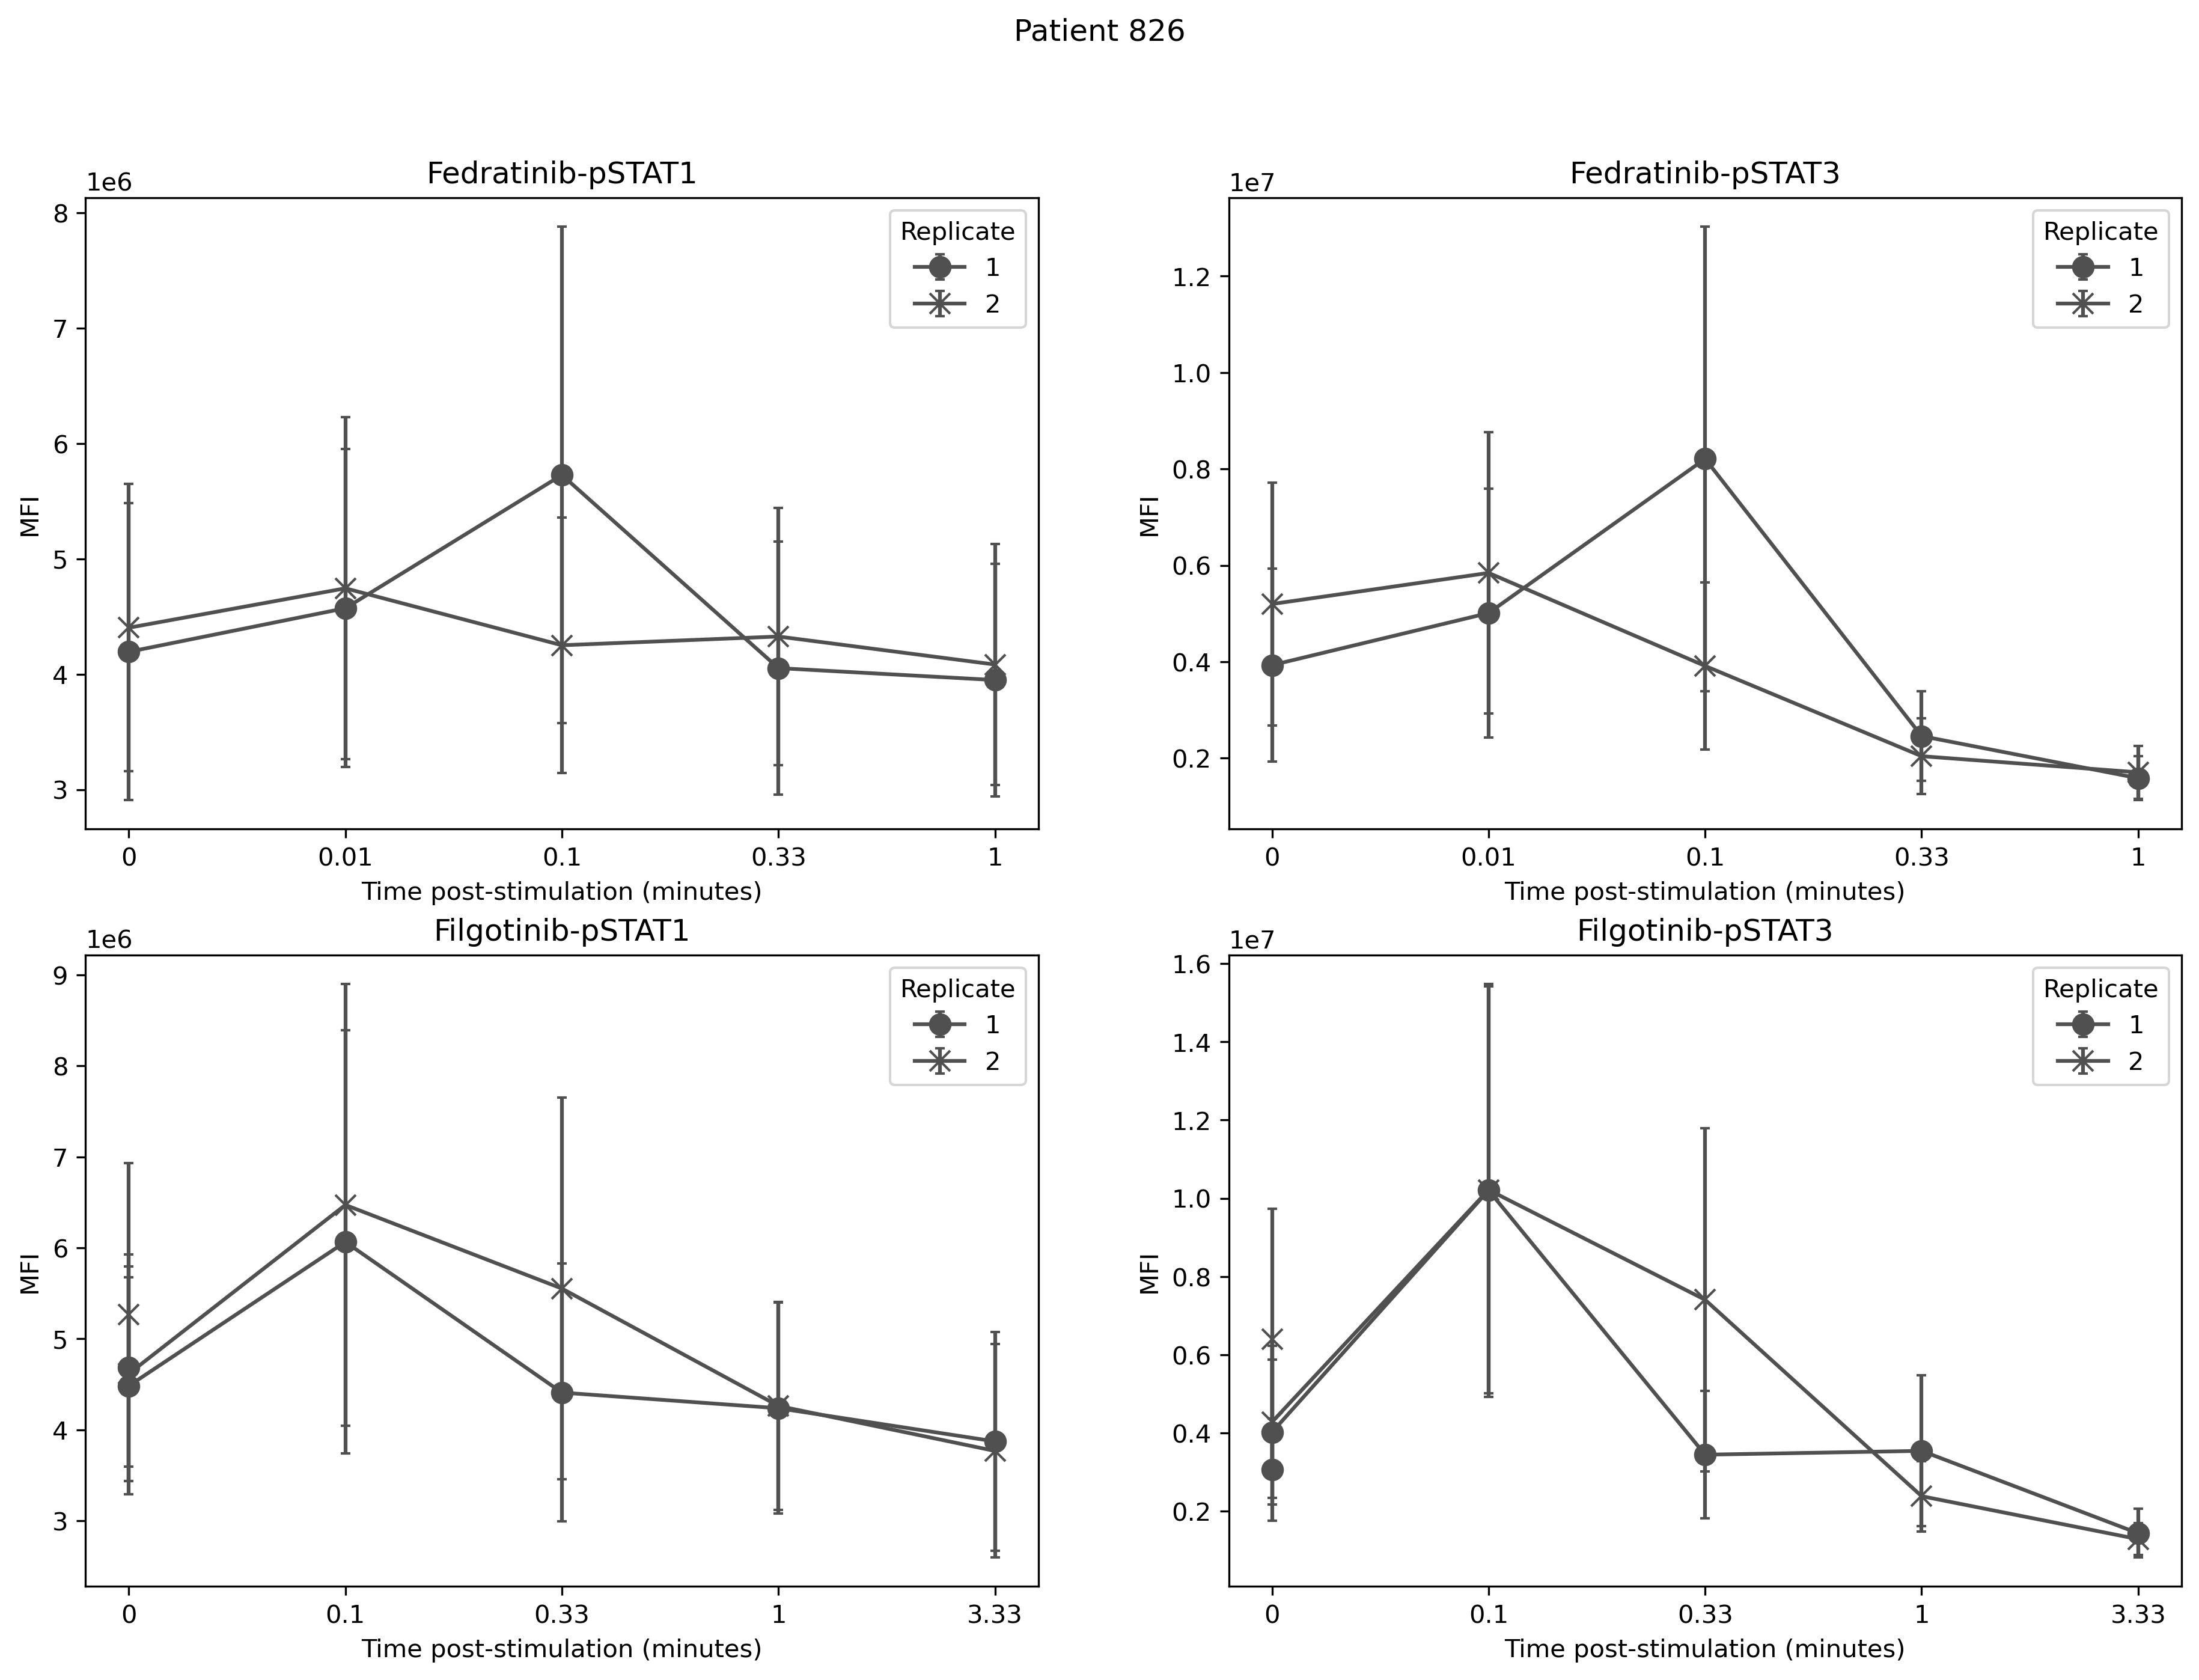

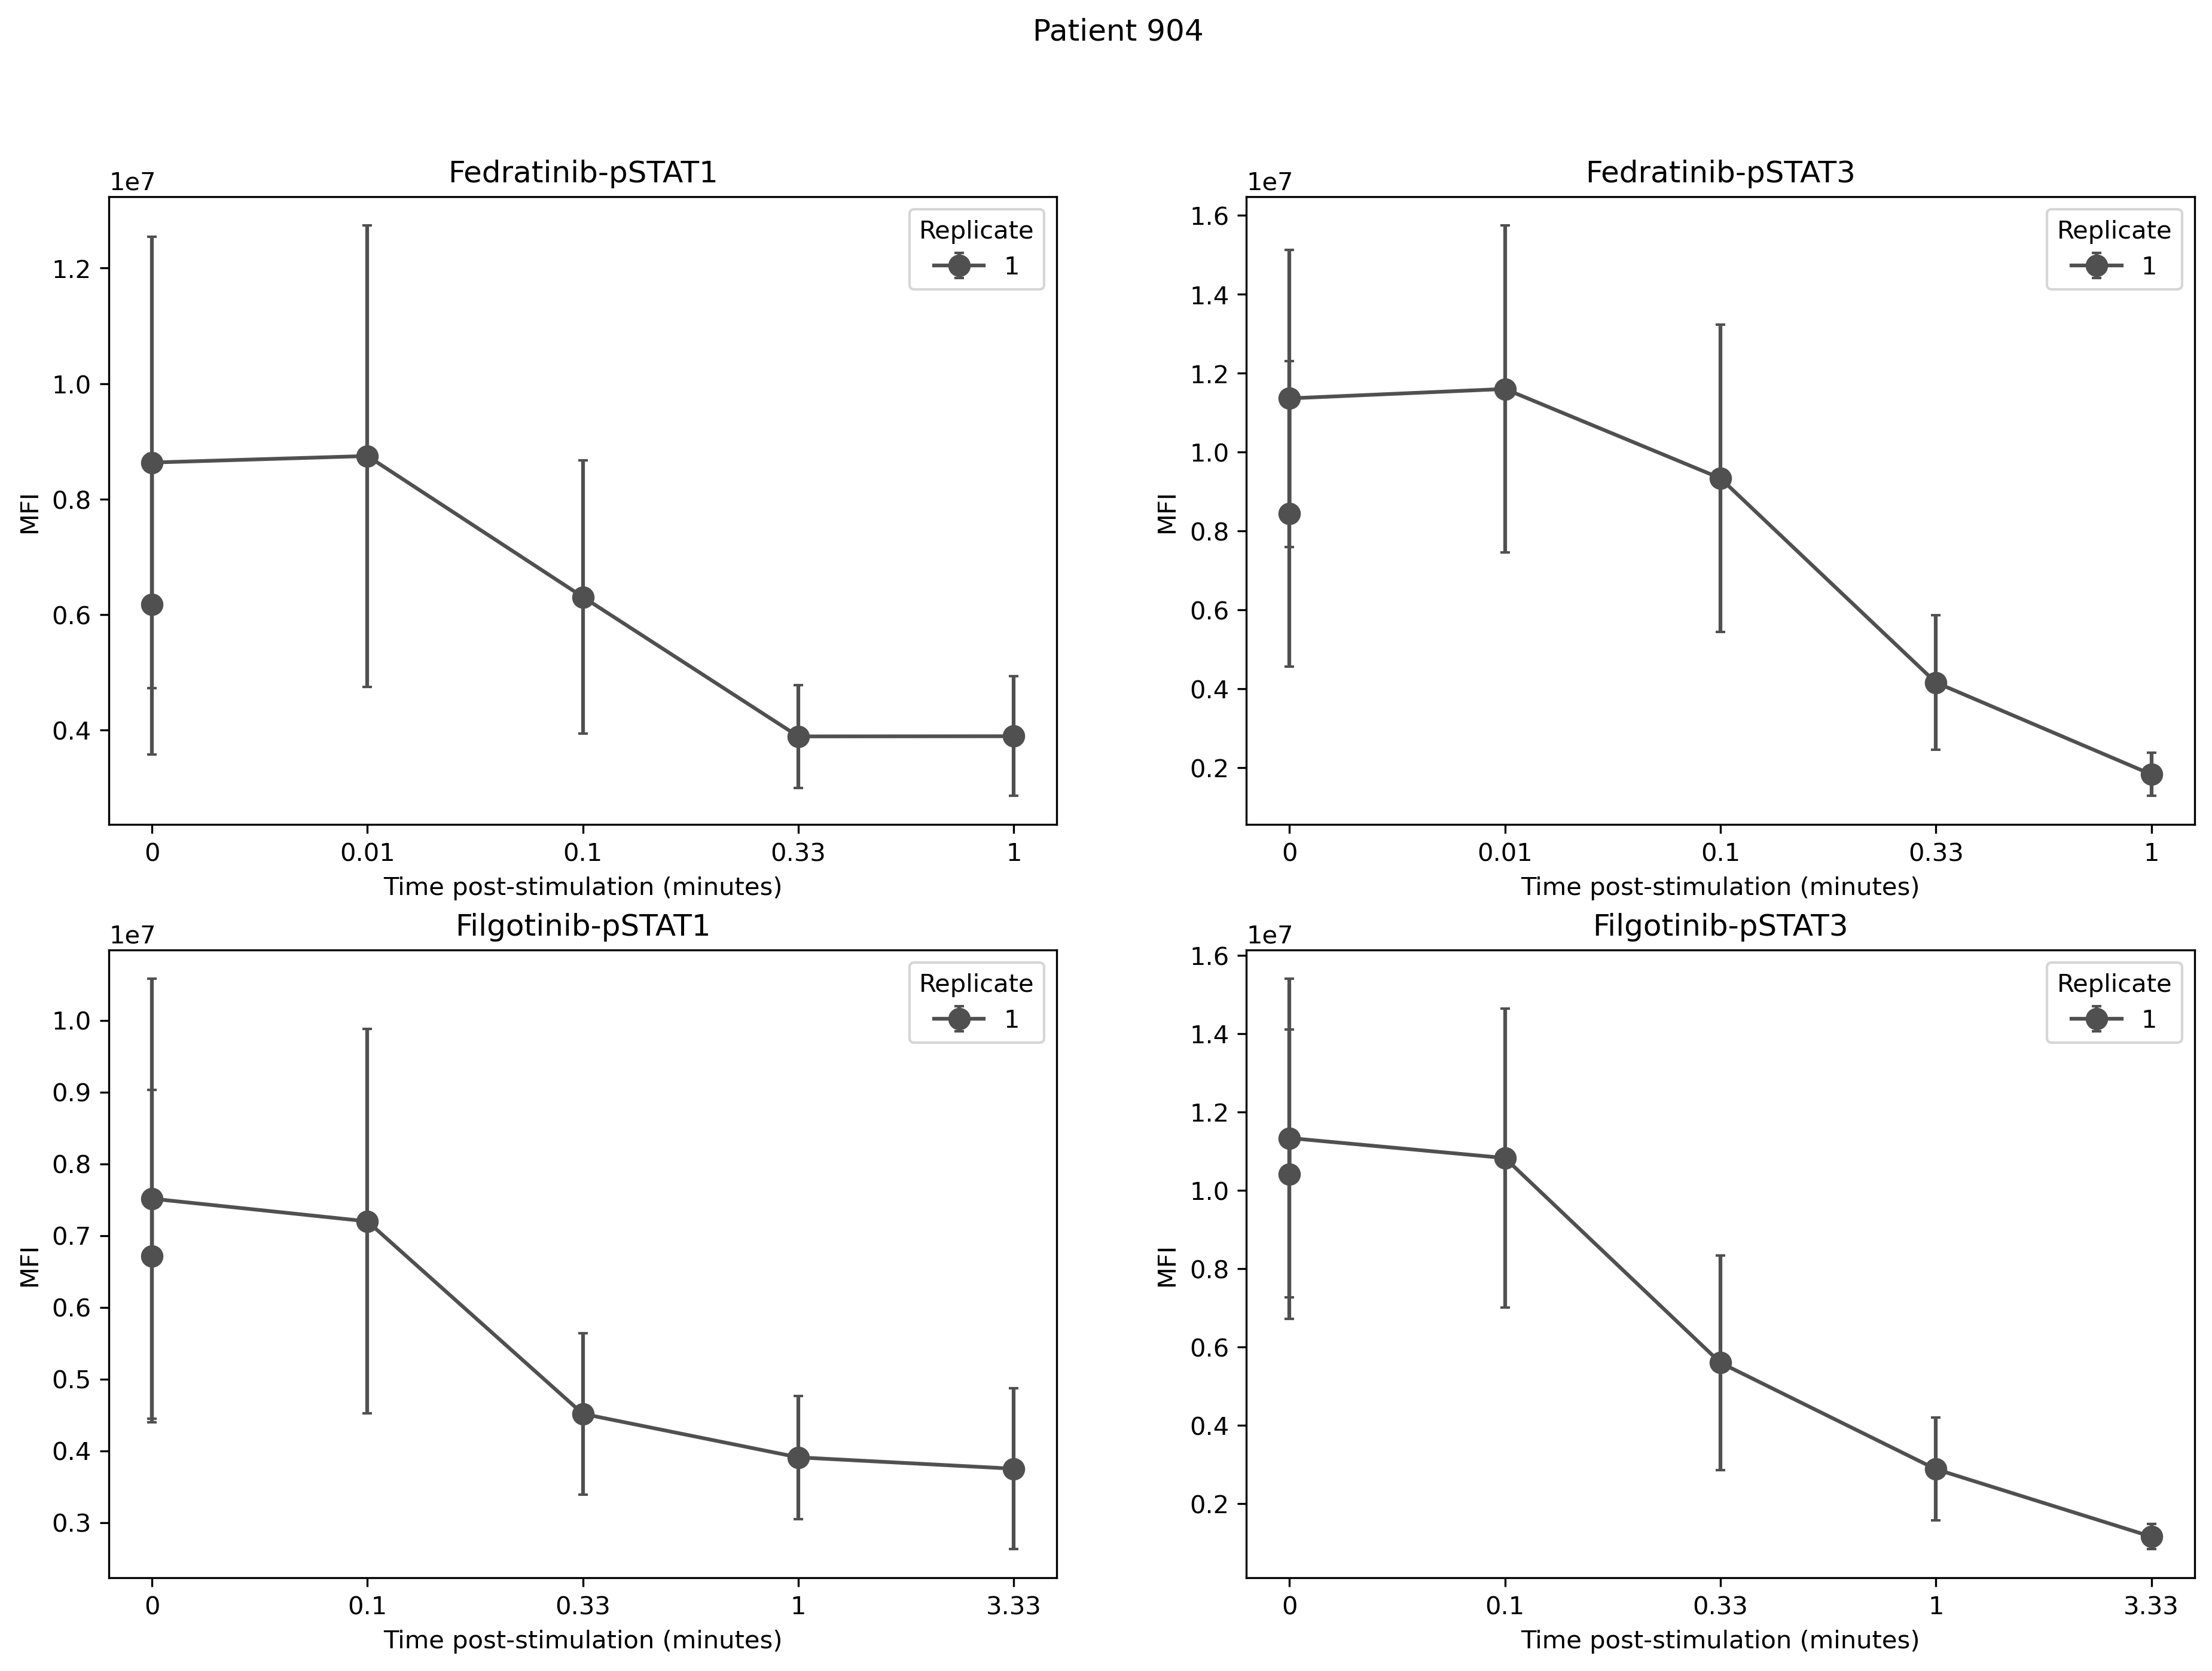

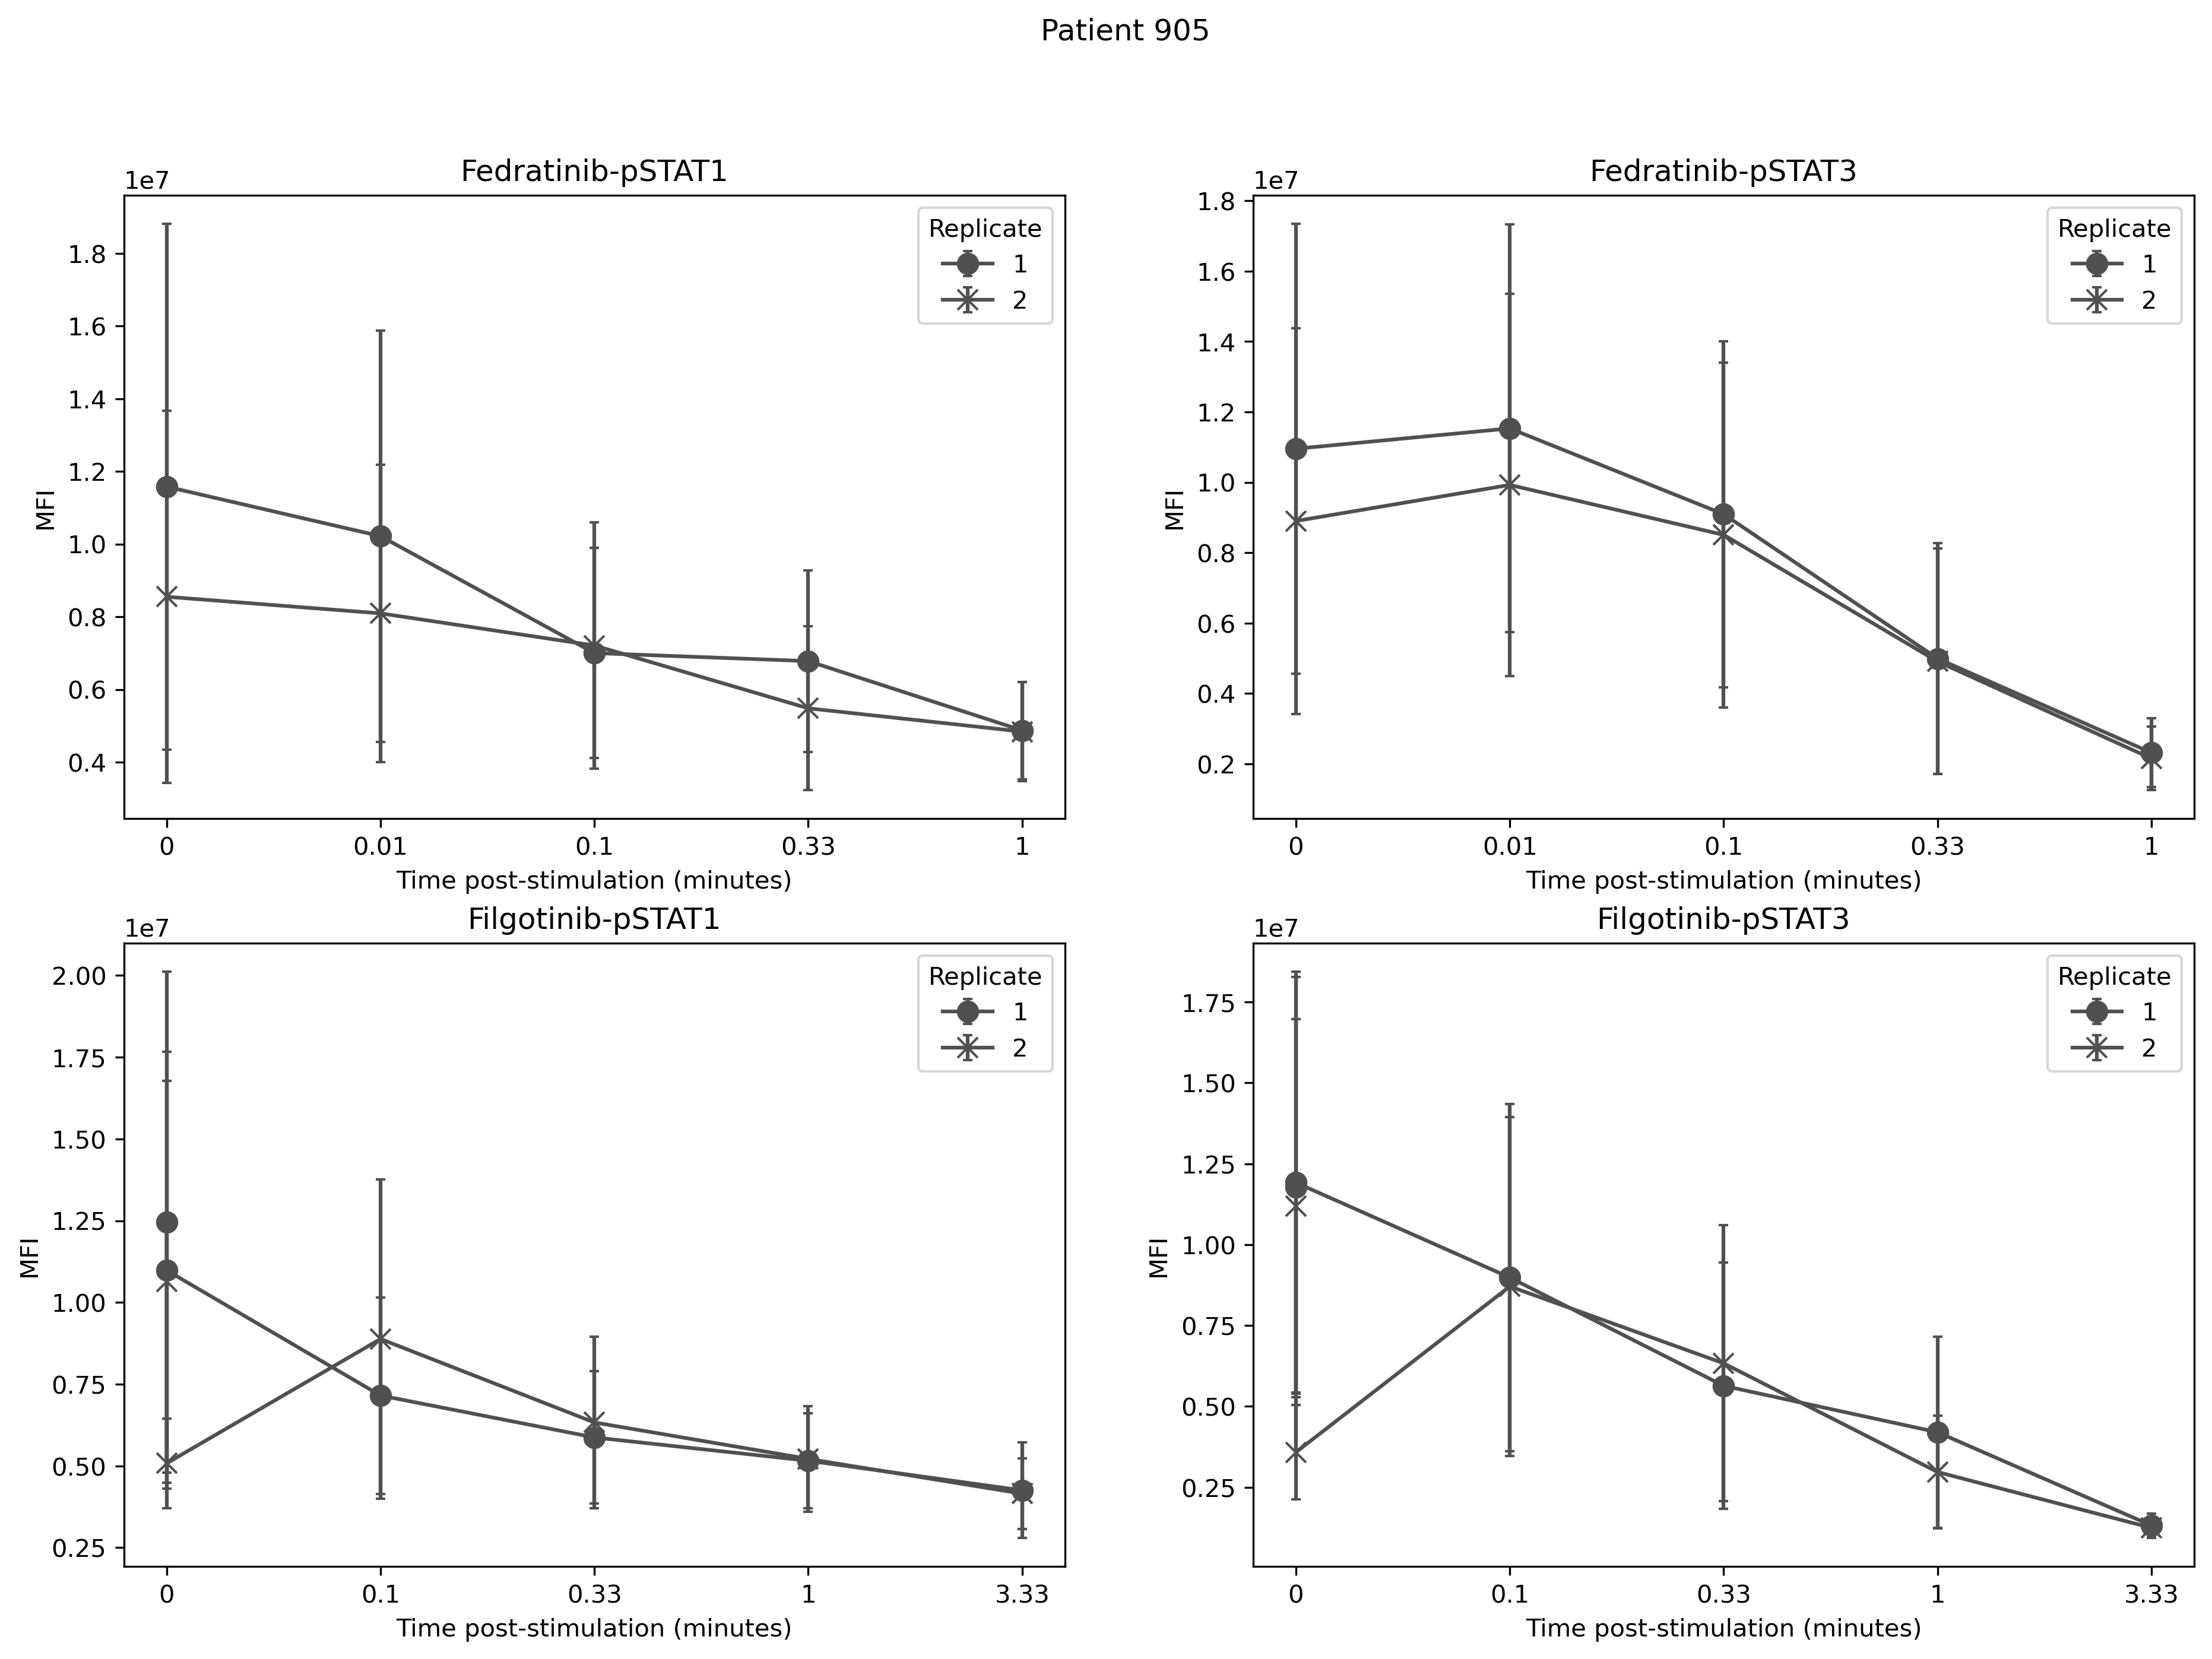

In [ ]:
og_df = dfs[0].copy()
dose_to_ls = {
	"10 ng/mL": "-",
	"1 ng/mL": "dotted"
}

dose_to_color = {
	"1 ng/mL": "r",
	"10 ng/mL":"b"
}

il6_to_marker = {
	"1 ng/mL": "d",
	"10 ng/mL": "x"
}

replicate_to_marker = {
	1:"o",
	2:"x",
	3:"v"
}

PLOT_SPECIALS = False

ms = 8 # markersize
color = "#505050"
fig1, axs1 = plt.subplots(2,2, figsize=(15,10), dpi=300)
fig2, axs2 = plt.subplots(2,2, figsize=(15,10), dpi=300)
fig3, axs3 = plt.subplots(2,2, figsize=(15,10), dpi=300)
fig4, axs4 = plt.subplots(2,2, figsize=(15,10), dpi=300)

# Select tSTAT measurement
df = og_df[(og_df["STAT"] == "Fedra")]

timing_df = pd.DataFrame(columns=df.columns)

for pat, cur_axs in zip(df["PatientId"].unique(), [axs1, axs2, axs3, axs4]):
	# Plot tSTATs from first scan
	stat1_ax = cur_axs[0][0]
	stat3_ax = cur_axs[0][1]
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"]== rep)]
		if select_df.empty:
			continue;
		if rep == 1 and pat != 904:
			# get the first row 
			special = select_df.iloc[0, :]   
			select_df = select_df.drop(index=select_df.index[0])
			
			og_df.drop(index=special.name, inplace=True)
			timing_df.loc[special.name] = special
			if PLOT_SPECIALS:
				stat1_ax.errorbar(special["Time"], special["STAT1 Mean"], yerr=special["STAT1 SEM"], marker=replicate_to_marker[rep], ms=ms, color="red",
						label=f"15 minute IL-6 Stim", capsize=2, zorder=3)
				stat3_ax.errorbar(special["Time"], special["STAT3 Mean"], yerr=special["STAT3 SEM"], marker=replicate_to_marker[rep], ms=ms, color="red",
						label=f"15 minute IL-6 Stim", capsize=2, zorder=3)
		elif rep == 2 and pat != 904:
			# get the first row
			special = select_df.iloc[0, :] 
			select_df = select_df.drop(index=select_df.index[0])
			og_df.drop(index=special.name, inplace=True)
			timing_df.loc[special.name] = special
			if PLOT_SPECIALS:
				stat1_ax.errorbar(special["Time"], special["STAT1 Mean"], yerr=special["STAT1 SEM"], marker=replicate_to_marker[rep], ms=ms, color="blue",
						label=f"25 minute IL-6 Stim", capsize=2, zorder=3)
				stat3_ax.errorbar(special["Time"], special["STAT3 Mean"], yerr=special["STAT3 SEM"], marker=replicate_to_marker[rep], ms=ms, color="blue",
						label=f"25 minute IL-6 Stim", capsize=2, zorder=3)
		elif pat == "904":
			special = select_df.iloc[0, :] 
			timing_df.loc[special.name] = special
			og_df.drop(index=special.name, inplace=True)
			
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
		
		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
	stat1_ax.set_ylabel("MFI")
	stat1_ax.set_xlabel("Time post-stimulation (minutes)")
	stat1_ax.legend(title="Replicate")
	stat1_ax.set_title("Fedratinib-pSTAT1")
	stat3_ax.set_ylabel("MFI")
	stat3_ax.set_xlabel("Time post-stimulation (minutes)")
	stat3_ax.legend(title="Replicate")
	stat3_ax.set_title("Fedratinib-pSTAT3")



# Select pSTAT measurement
df = og_df[og_df["STAT"] == "Filgo"]

for pat, cur_axs in zip(df["PatientId"].unique(), [axs1, axs2, axs3, axs4]):
	# Plot tSTATs from first scan
	stat1_ax = cur_axs[1][0]
	stat3_ax = cur_axs[1][1]
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"] == rep)]
		if select_df.empty:
			continue
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)

		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
		#print(f"Patient {pat}, Rep {rep}")
		if rep == 1 and pat != 904:
			# get the first row 
			special = select_df.iloc[0, :]			
			select_df = select_df.drop(index=select_df.index[0])
			timing_df.loc[special.name] = special
			og_df.drop(index=special.name, inplace=True)
			if PLOT_SPECIALS:
				stat1_ax.errorbar(special["Time"], special["STAT1 Mean"], yerr=special["STAT1 SEM"], marker=replicate_to_marker[rep], ms=ms, color="red",
						label=f"15 minute IL-6 Stim", capsize=2, zorder=3)
				stat3_ax.errorbar(special["Time"], special["STAT3 Mean"], yerr=special["STAT3 SEM"], marker=replicate_to_marker[rep], ms=ms, color="red",
						label=f"15 minute IL-6 Stim", capsize=2, zorder=3)
		elif rep == 2 and pat != 904:
			# get the first row 
			special = select_df.iloc[0, :]
			select_df = select_df.drop(index=select_df.index[0])
			timing_df.loc[special.name] = special
			og_df.drop(index=special.name, inplace=True)
			if PLOT_SPECIALS:
				stat1_ax.errorbar(special["Time"], special["STAT1 Mean"], yerr=special["STAT1 SEM"], marker=replicate_to_marker[rep], ms=ms, color="blue",
						label=f"25 minute IL-6 Stim", capsize=2, zorder=3)
				stat3_ax.errorbar(special["Time"], special["STAT3 Mean"], yerr=special["STAT3 SEM"], marker=replicate_to_marker[rep], ms=ms, color="blue",
						label=f"25 minute IL-6 Stim", capsize=2, zorder=3)
		elif pat == "904":
			special = select_df.iloc[0, :] 
			timing_df.loc[special.name] = special	
			og_df.drop(index=special.name, inplace=True)
	stat1_ax.set_ylabel("MFI")
	stat1_ax.set_xlabel("Time post-stimulation (minutes)")
	stat1_ax.legend(title="Replicate")
	stat1_ax.set_title("Filgotinib-pSTAT1")
	stat3_ax.set_ylabel("MFI")
	stat3_ax.set_xlabel("Time post-stimulation (minutes)")
	stat3_ax.legend(title="Replicate")
	stat3_ax.set_title("Filgotinib-pSTAT3")


id1 = df["PatientId"].unique()[0]
id2 = df["PatientId"].unique()[1]
id3 = df["PatientId"].unique()[2]
id4 = df["PatientId"].unique()[3]

fig1.suptitle(f"Patient {id1}")
fig2.suptitle(f"Patient {id2}");
fig3.suptitle(f"Patient {id3}")
fig4.suptitle(f"Patient {id4}")

In [47]:
display(og_df)

,STAT1 Mean,STAT1 SEM,STAT3 Mean,STAT3 SEM,STAT,PatientId,IL-6 Concentration,Time,Replicate,Date
A02,1.109546e+07,7.689880e+06,9.948857e+06,7.642550e+06,Fedra,813,10 ng/mL,0,1,09182025_IF_scan
A03,7.014542e+06,5.746078e+06,6.598611e+06,7.106622e+06,Fedra,813,10 ng/mL,0.01,1,09182025_IF_scan
A04,4.724635e+06,2.397067e+06,2.721295e+06,2.312430e+06,Fedra,813,10 ng/mL,0.1,1,09182025_IF_scan
A05,4.370846e+06,2.381619e+06,1.896867e+06,1.355133e+06,Fedra,813,10 ng/mL,0.33,1,09182025_IF_scan
A06,4.166304e+06,1.807093e+06,1.674922e+06,1.633805e+06,Fedra,813,10 ng/mL,1,1,09182025_IF_scan
...,...,...,...,...,...,...,...,...,...,...
G08,5.079500e+06,1.368897e+06,3.582928e+06,1.464147e+06,Filgo,905,10 ng/mL,0,2,09182025_IF_scan
G09,8.883229e+06,4.878974e+06,8.709493e+06,5.243161e+06,Filgo,905,10 ng/mL,0.1,2,09182025_IF_scan
G10,6.329932e+06,2.623769e+06,6.331410e+06,4.265574e+06,Filgo,905,10 ng/mL,0.33,2,09182025_IF_scan
G11,5.215255e+06,1.619471e+06,2.971685e+06,1.740052e+06,Filgo,905,10 ng/mL,1,2,09182025_IF_scan


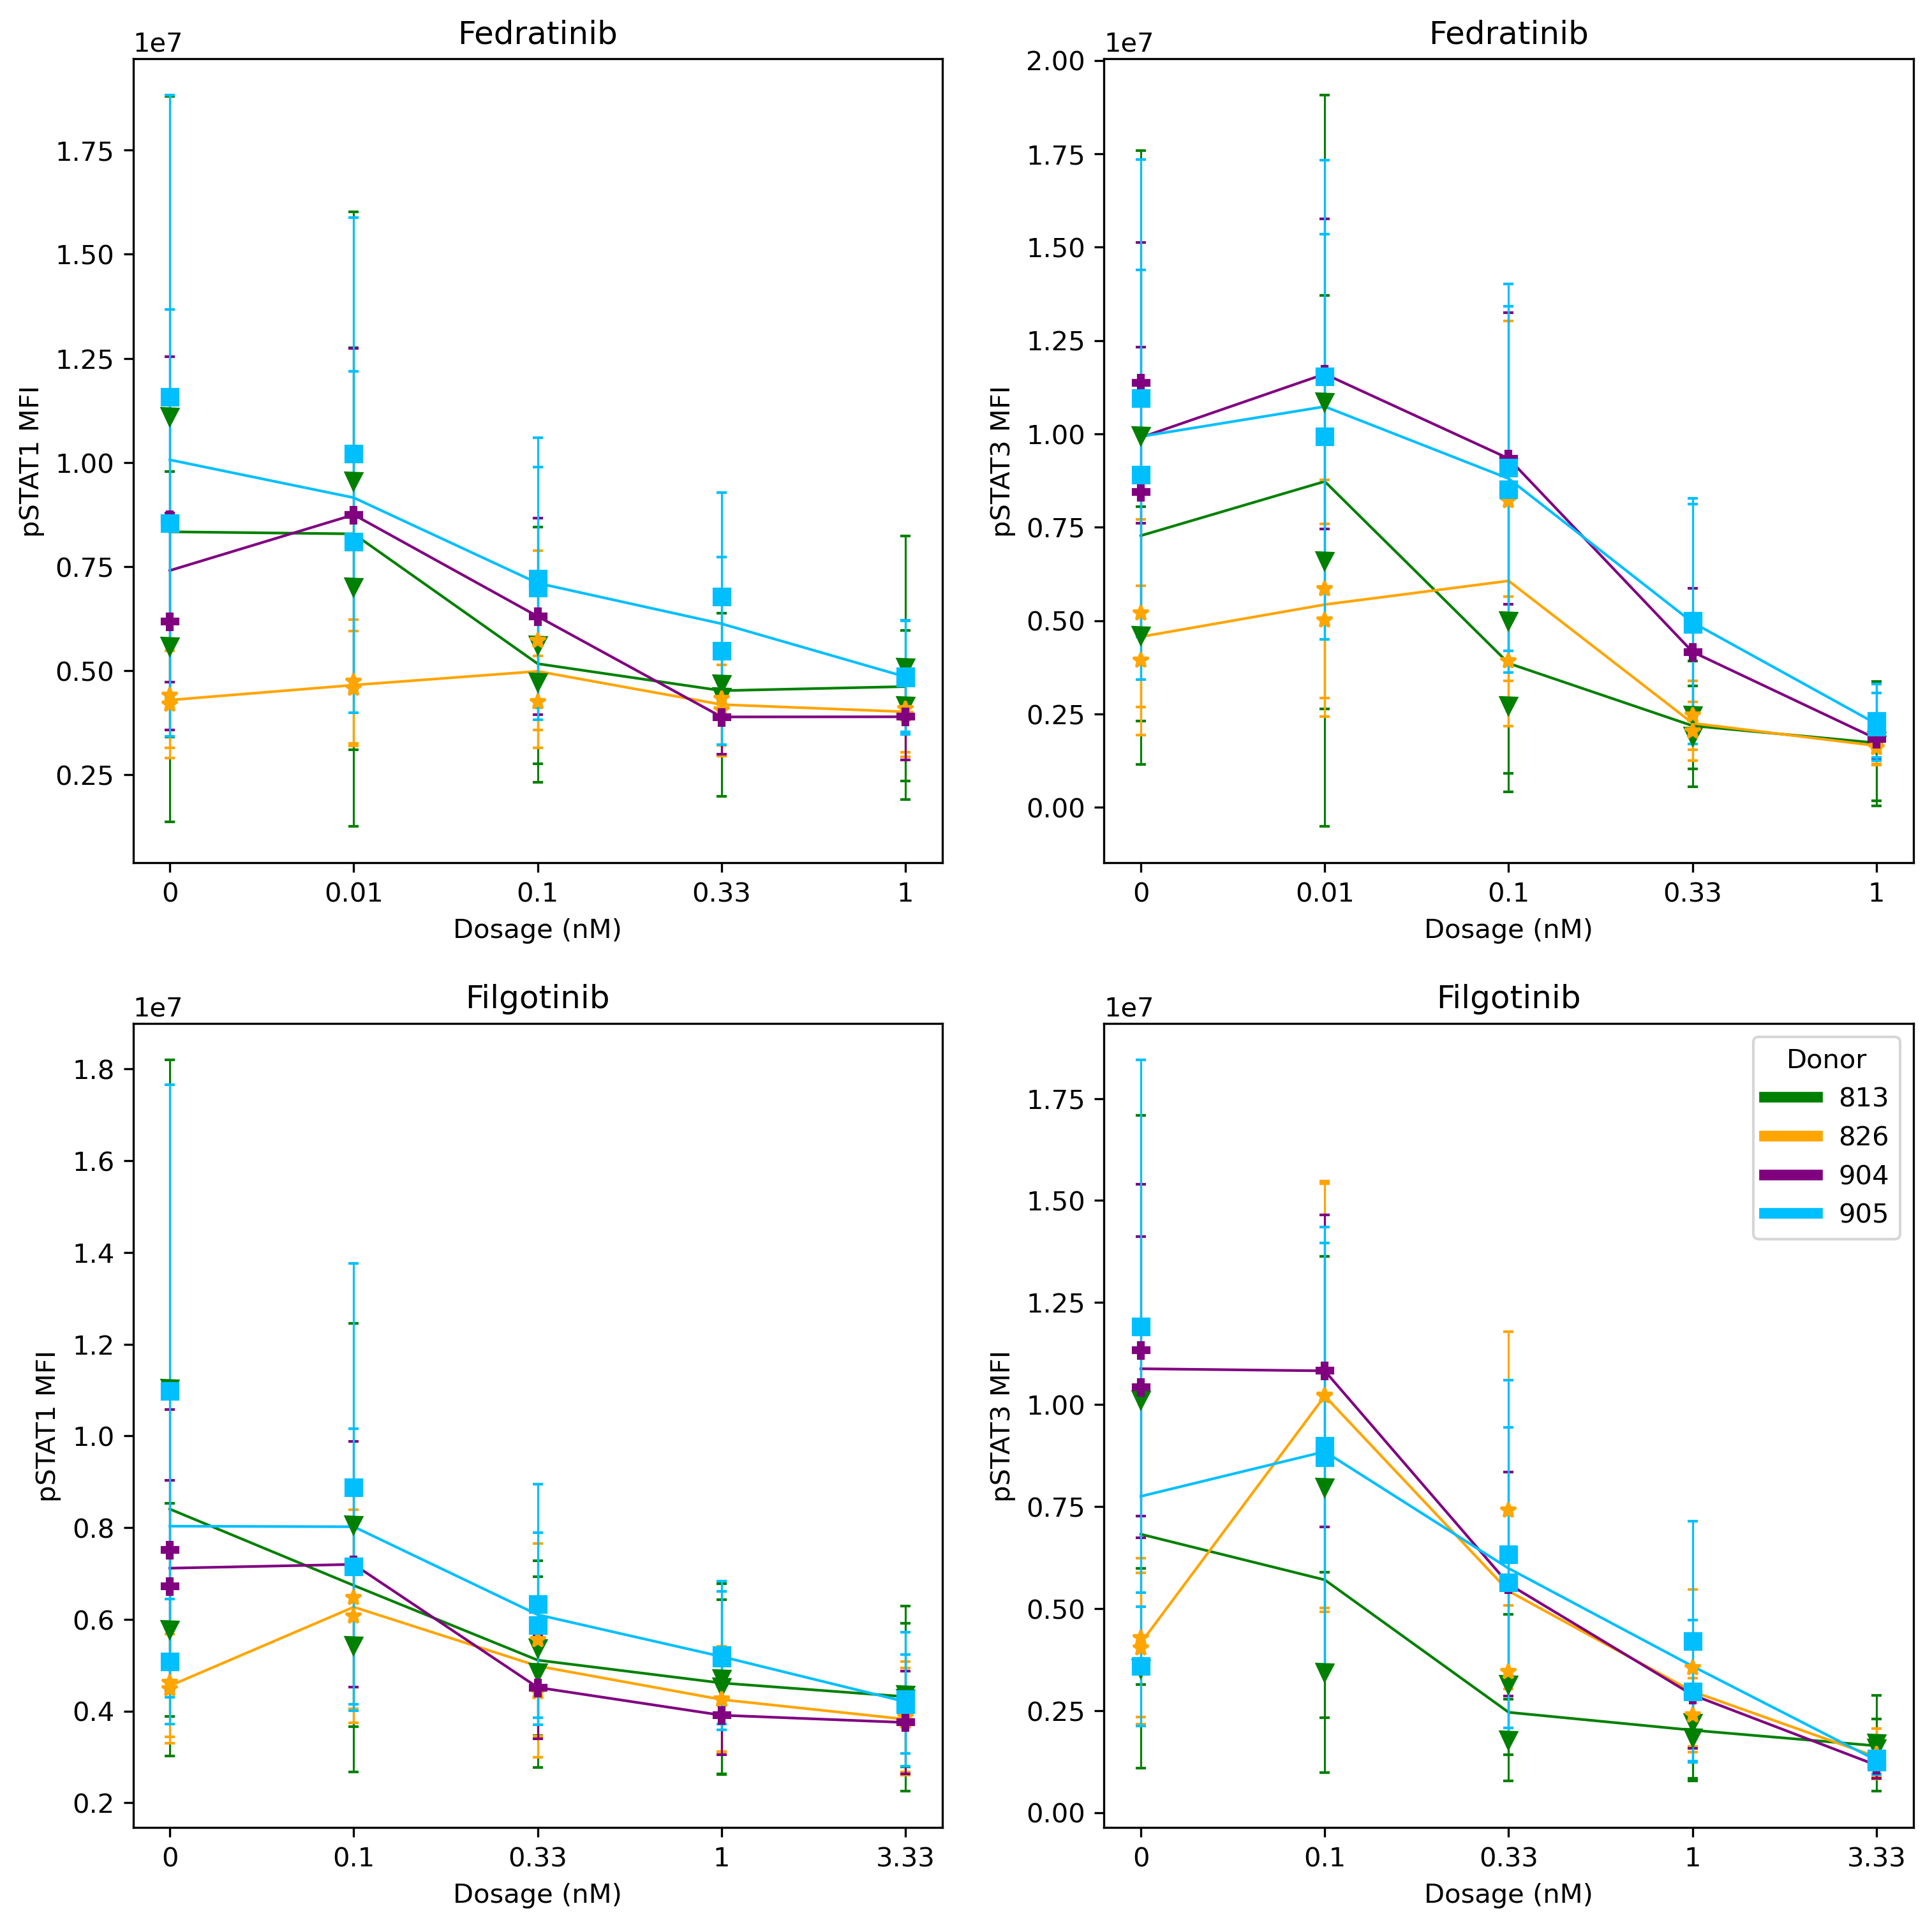

In [ ]:
#og_df = dfs[0]


patient_to_color = {
	617: "r",
	626: "darkblue",
	813: "g",
	826: "orange",
	904: "purple",
	905: "deepskyblue"
}


patient_to_marker = {
	617:"o",
	626:"x",
	813:"v",
	826:"*",
	904:"P",
	905:"s"
}

ms = 6 # markersize
fig1, axs = plt.subplots(2,2, figsize=(12,12), dpi=300)

# Select tSTAT measurement
df = og_df[(og_df["STAT"] == "Fedra")]

for pat in df["PatientId"].unique():
	# Plot tSTATs from first scan
	stat1_ax = axs[0][0]
	stat3_ax = axs[0][1]
 
	cur_df = df.loc[df["PatientId"] == pat]

	stat1_ax.plot(cur_df["Time"].unique(), cur_df.groupby("Time")["STAT1 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
	 				lw=1, label=f"{pat} Average")

	stat3_ax.plot(cur_df["Time"].unique(), cur_df.groupby("Time")["STAT3 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
	 				lw=1, label=f"{pat} Average")
 
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"]== rep)]
		if select_df.empty:
			continue
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none",
	 				lw=0.75, label=f"{pat} - {rep}", capsize=2)
		
		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none", 
	 				lw=0.75,  label=f"{pat} - {rep}", capsize=2)
	stat1_ax.set_ylabel("pSTAT1 MFI")
	stat1_ax.set_xlabel("Dosage (nM)")
	#stat1_ax.legend(title="Donor")
	stat1_ax.set_title("Fedratinib")
	stat3_ax.set_ylabel("pSTAT3 MFI")
	stat3_ax.set_xlabel("Dosage (nM)")
	#stat3_ax.legend(title="Donor")
	stat3_ax.set_title("Fedratinib")
 
# Select tSTAT measurement
df = og_df[(og_df["STAT"] == "Filgo")]

for pat in df["PatientId"].unique():
	# Plot tSTATs from first scan
	stat1_ax = axs[1][0]
	stat3_ax = axs[1][1]

	cur_df = df.loc[df["PatientId"] == pat]

	stat1_ax.plot(cur_df["Time"].unique(), cur_df.groupby("Time")["STAT1 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
	 				lw=1, label=f"{pat}")

	stat3_ax.plot(cur_df["Time"].unique(), cur_df.groupby("Time")["STAT3 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
	 				lw=1, label=f"{pat}")
 
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		label = f"{pat}"
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"]== rep)]
		if select_df.empty:
			continue
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none", 
	 				lw=0.75, label=None, capsize=2)
		
		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none", 
	 				lw=0.75, label=None, capsize=2)
	stat1_ax.set_ylabel("pSTAT1 MFI")
	stat1_ax.set_xlabel("Dosage (nM)")
	#stat1_ax.legend(title="Donor")
	stat1_ax.set_title("Filgotinib")
	stat3_ax.set_ylabel("pSTAT3 MFI")
	stat3_ax.set_xlabel("Dosage (nM)")
	leg = stat3_ax.legend(title="Donor")
	# change the line width for the legend
	for line in leg.get_lines():
		line.set_linewidth(4.0)
	stat3_ax.set_title("Filgotinib")


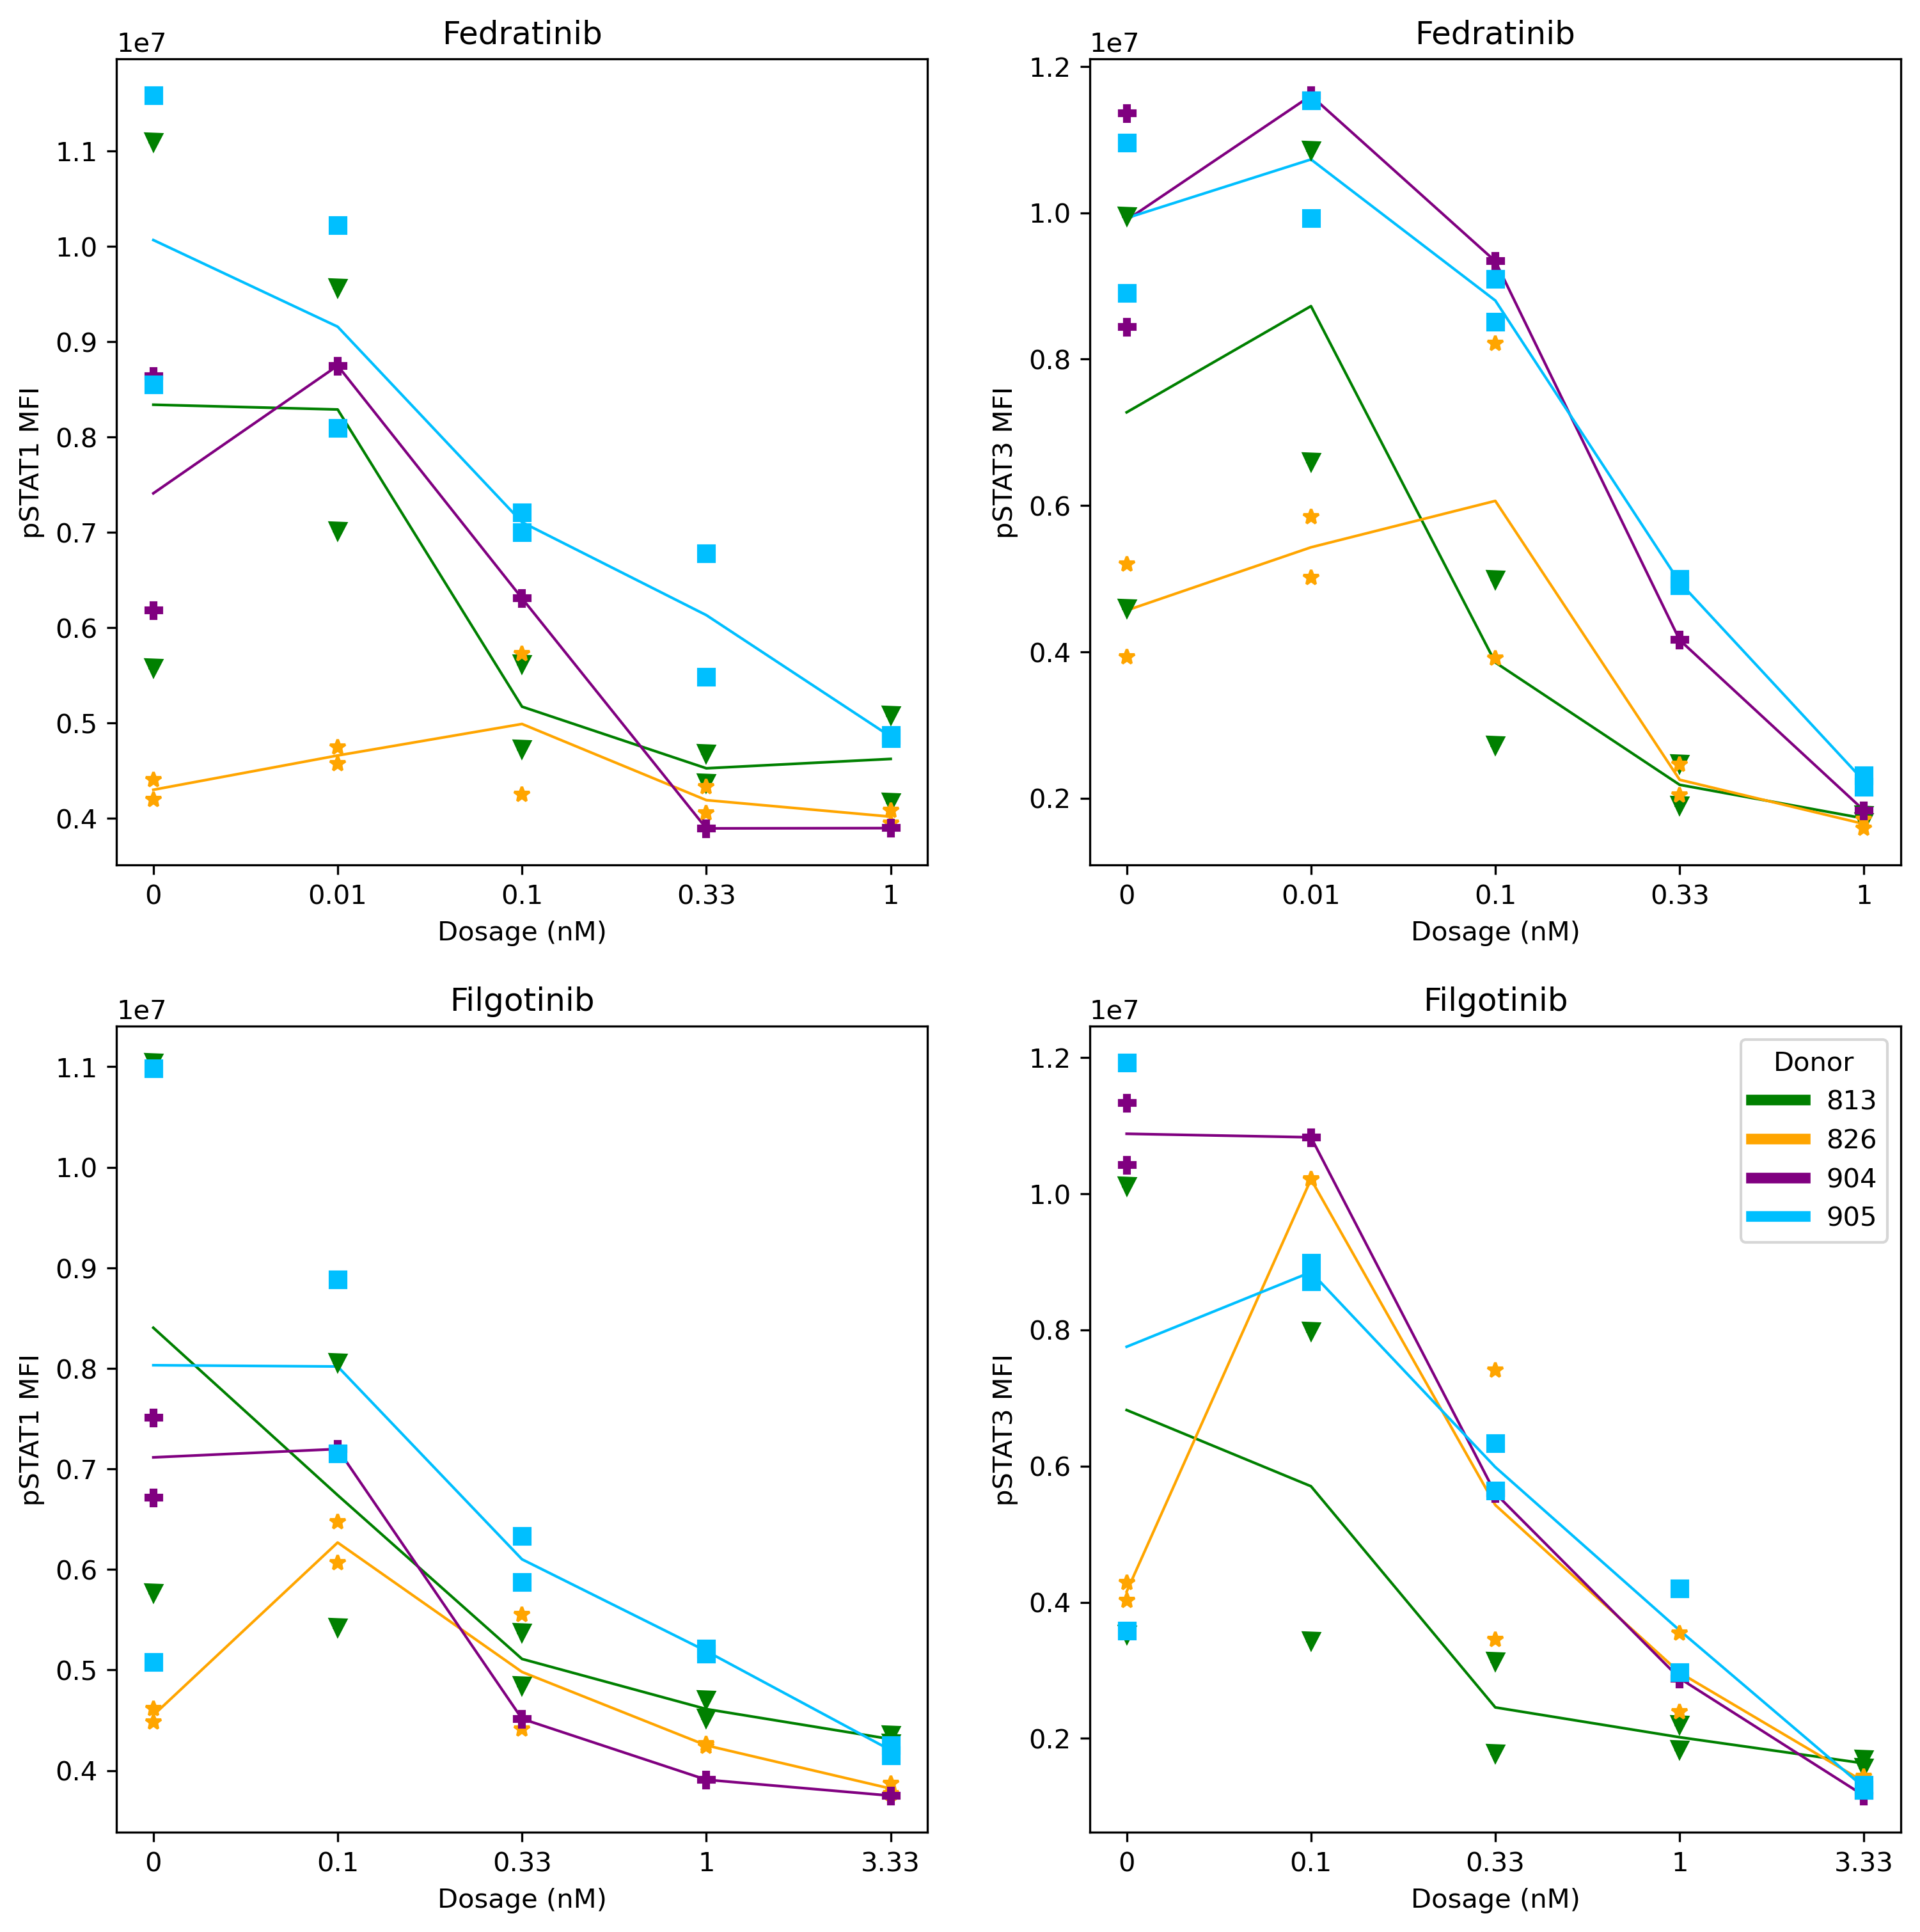

In [70]:
fig1, axs = plt.subplots(2,2, figsize=(12,12), dpi=300)

# Select tSTAT measurement
df = og_df[(og_df["STAT"] == "Fedra")].copy()
df["STAT1 SEM"] = [0] * len(df)
df["STAT3 SEM"] = [0] * len(df)
for pat in df["PatientId"].unique():
	# Plot tSTATs from first scan
	stat1_ax = axs[0][0]
	stat3_ax = axs[0][1]
 
	cur_df = df.loc[df["PatientId"] == pat]

	stat1_ax.plot(cur_df["Time"].unique(), cur_df.groupby("Time")["STAT1 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
	 				lw=1, label=f"{pat} Average")

	stat3_ax.plot(cur_df["Time"].unique(), cur_df.groupby("Time")["STAT3 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
	 				lw=1, label=f"{pat} Average")
 
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"]== rep)]
		if select_df.empty:
			continue
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none",
	 				lw=0.75, label=f"{pat} - {rep}", capsize=2)
		
		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none", 
	 				lw=0.75,  label=f"{pat} - {rep}", capsize=2)
	stat1_ax.set_ylabel("pSTAT1 MFI")
	stat1_ax.set_xlabel("Dosage (nM)")
	#stat1_ax.legend(title="Donor")
	stat1_ax.set_title("Fedratinib")
	stat3_ax.set_ylabel("pSTAT3 MFI")
	stat3_ax.set_xlabel("Dosage (nM)")
	#stat3_ax.legend(title="Donor")
	stat3_ax.set_title("Fedratinib")
 
# Select tSTAT measurement
df = og_df[(og_df["STAT"] == "Filgo")].copy()
df["STAT1 SEM"] = [0] * len(df)
df["STAT3 SEM"] = [0] * len(df)

for pat in df["PatientId"].unique():
	# Plot tSTATs from first scan
	stat1_ax = axs[1][0]
	stat3_ax = axs[1][1]

	cur_df = df.loc[df["PatientId"] == pat]

	stat1_ax.plot(cur_df["Time"].unique(), cur_df.groupby("Time")["STAT1 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
	 				lw=1, label=f"{pat}")

	stat3_ax.plot(cur_df["Time"].unique(), cur_df.groupby("Time")["STAT3 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
	 				lw=1, label=f"{pat}")
 
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		label = f"{pat}"
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"]== rep)]
		if select_df.empty:
			continue
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none", 
	 				lw=0.75, label=None, capsize=2)
		
		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none", 
	 				lw=0.75, label=None, capsize=2)
	stat1_ax.set_ylabel("pSTAT1 MFI")
	stat1_ax.set_xlabel("Dosage (nM)")
	#stat1_ax.legend(title="Donor")
	stat1_ax.set_title("Filgotinib")
	stat3_ax.set_ylabel("pSTAT3 MFI")
	stat3_ax.set_xlabel("Dosage (nM)")
	leg = stat3_ax.legend(title="Donor")
	# change the line width for the legend
	for line in leg.get_lines():
		line.set_linewidth(4.0)
	stat3_ax.set_title("Filgotinib")

In [63]:
timing_df

,STAT1 Mean,STAT1 SEM,STAT3 Mean,STAT3 SEM,STAT,PatientId,IL-6 Concentration,Time,Replicate,Date
A01,6.711064e+06,4.439236e+06,5.685091e+06,4.951131e+06,Fedra,813,10 ng/mL,0,1,09182025_IF_scan
A02,1.109546e+07,7.689880e+06,9.948857e+06,7.642550e+06,Fedra,813,10 ng/mL,0,1,09182025_IF_scan
A07,9.883612e+06,6.743620e+06,9.549403e+06,7.401540e+06,Filgo,813,10 ng/mL,0,1,09182025_IF_scan
A08,5.769327e+06,2.755472e+06,3.529515e+06,2.447291e+06,Filgo,813,10 ng/mL,0,1,09182025_IF_scan
A11,4.702473e+06,2.073368e+06,1.836870e+06,1.063064e+06,Filgo,813,10 ng/mL,1,1,09182025_IF_scan
A12,4.271965e+06,2.016590e+06,1.697568e+06,1.170578e+06,Filgo,813,10 ng/mL,3.33,1,09182025_IF_scan
B01,1.469013e+07,1.008791e+07,1.298357e+07,9.394661e+06,Fedra,813,10 ng/mL,0,2,09182025_IF_scan
B02,5.579313e+06,4.206742e+06,4.596359e+06,3.451186e+06,Fedra,813,10 ng/mL,0,2,09182025_IF_scan
B07,1.720624e+07,1.048061e+07,1.585879e+07,8.930431e+06,Filgo,813,10 ng/mL,0,2,09182025_IF_scan
B08,1.103842e+07,7.155571e+06,1.011324e+07,6.975842e+06,Filgo,813,10 ng/mL,0,2,09182025_IF_scan


In [ ]:
timing_df = dfs[0].copy()
timing_df = timing_df.loc[timing_df.index.str[-2:].isin(["01","02","07","08"])]
new_col = []
for idx, d in timing_df.iterrows():
	pat = d["PatientId"]
	if pat != 904 and idx[-1] == "1":
		if d["Replicate"] == 1:
			new_col.append(15)
		else:
			new_col.append(25)
	else:
		new_col.append(20)
timing_df["IL-6 Stimulation"] = new_col
display(timing_df)

,STAT1 Mean,STAT1 SEM,STAT3 Mean,STAT3 SEM,STAT,PatientId,IL-6 Concentration,Time,Replicate,Date,IL-6 Stimulation
A01,6.711064e+06,4.439236e+06,5.685091e+06,4.951131e+06,Fedra,813,10 ng/mL,0,1,09182025_IF_scan,15
A02,1.109546e+07,7.689880e+06,9.948857e+06,7.642550e+06,Fedra,813,10 ng/mL,0,1,09182025_IF_scan,20
A07,9.883612e+06,6.743620e+06,9.549403e+06,7.401540e+06,Filgo,813,10 ng/mL,0,1,09182025_IF_scan,20
A08,5.769327e+06,2.755472e+06,3.529515e+06,2.447291e+06,Filgo,813,10 ng/mL,0,1,09182025_IF_scan,20
B01,1.469013e+07,1.008791e+07,1.298357e+07,9.394661e+06,Fedra,813,10 ng/mL,0,2,09182025_IF_scan,25
B02,5.579313e+06,4.206742e+06,4.596359e+06,3.451186e+06,Fedra,813,10 ng/mL,0,2,09182025_IF_scan,20
B07,1.720624e+07,1.048061e+07,1.585879e+07,8.930431e+06,Filgo,813,10 ng/mL,0,2,09182025_IF_scan,20
B08,1.103842e+07,7.155571e+06,1.011324e+07,6.975842e+06,Filgo,813,10 ng/mL,0,2,09182025_IF_scan,20
C01,6.737429e+06,3.569918e+06,8.247230e+06,4.928769e+06,Fedra,826,10 ng/mL,0,1,09182025_IF_scan,15
C02,4.193920e+06,1.286745e+06,3.931873e+06,1.995435e+06,Fedra,826,10 ng/mL,0,1,09182025_IF_scan,20


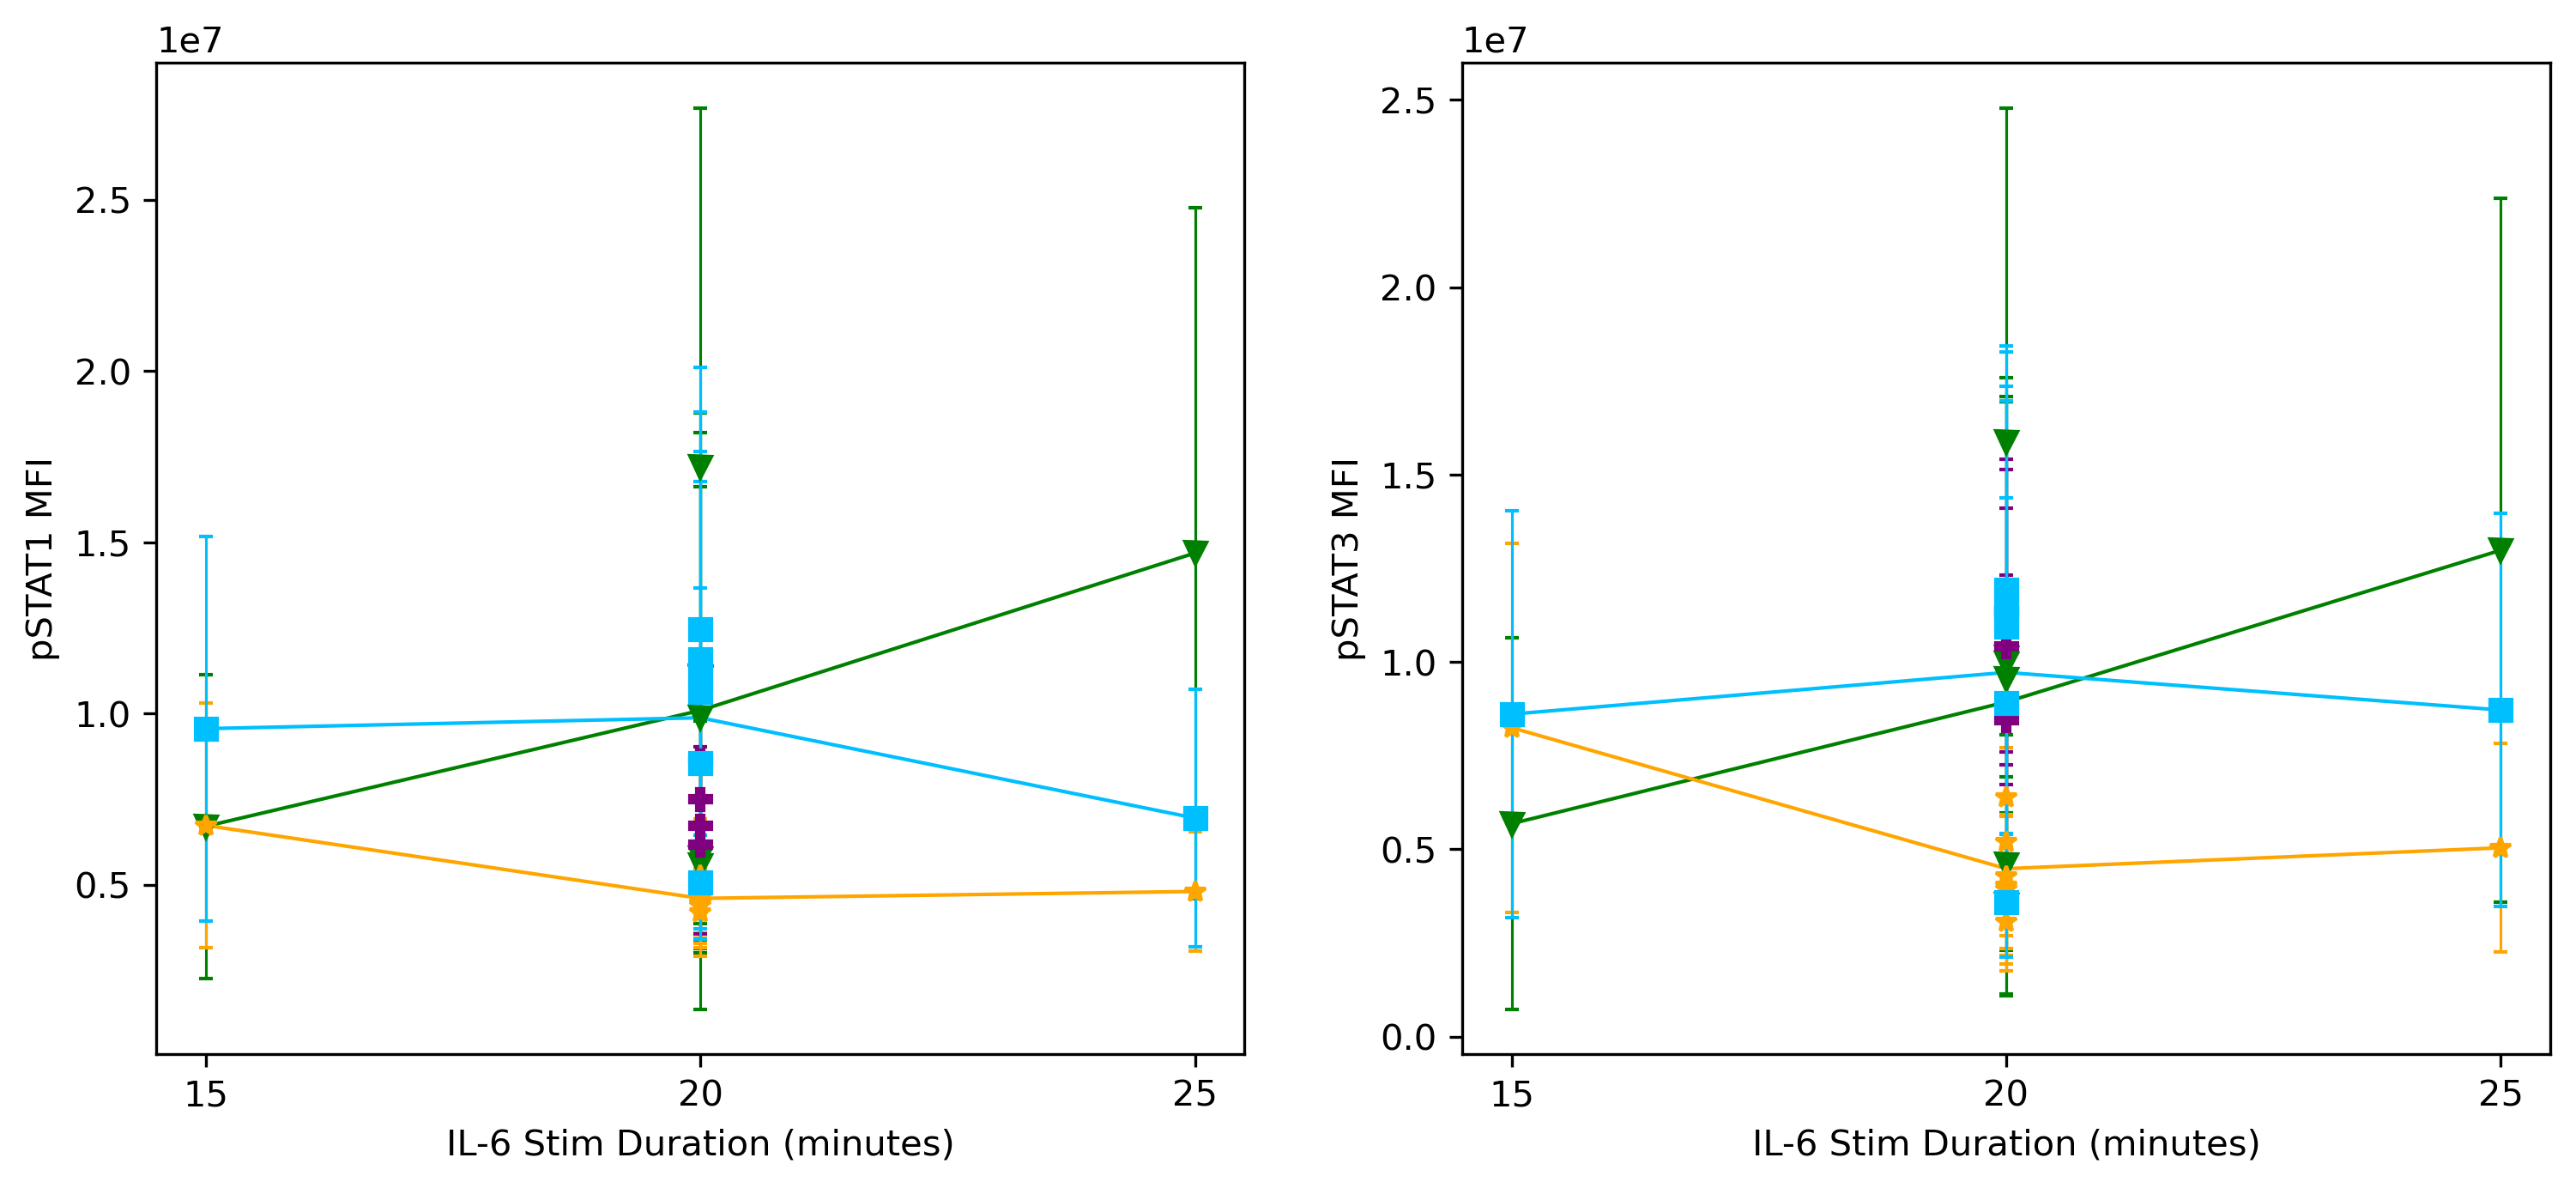

In [ ]:
fig1, axs = plt.subplots(1,2, figsize=(12,5), dpi=300)


df = timing_df
for pat in df["PatientId"].unique():
	# Plot tSTATs from first scan
	stat1_ax = axs[0]
	stat3_ax = axs[1]

	cur_df = df.loc[df["PatientId"] == pat]

	stat1_ax.plot(cur_df["IL-6 Stimulation"].unique(), cur_df.groupby("IL-6 Stimulation")["STAT1 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
					lw=1, label=f"{pat} Average")

	stat3_ax.plot(cur_df["IL-6 Stimulation"].unique(), cur_df.groupby("IL-6 Stimulation")["STAT3 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
					lw=1, label=f"{pat} Average")

	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"]== rep)]
		if select_df.empty:
			continue
		stat1_ax.errorbar(x=select_df["IL-6 Stimulation"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none",
					lw=0.75, label=f"{pat} - {rep}", capsize=2)
		
		stat3_ax.errorbar(x=select_df["IL-6 Stimulation"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none", 
					lw=0.75,  label=f"{pat} - {rep}", capsize=2)
stat1_ax.set_ylabel("pSTAT1 MFI")
stat1_ax.set_xlabel("IL-6 Stim Duration (minutes)")
stat3_ax.set_ylabel("pSTAT3 MFI")
stat3_ax.set_xlabel("IL-6 Stim Duration (minutes)")
stat1_ax.set_xticks(cur_df["IL-6 Stimulation"].unique())
stat3_ax.set_xticks(cur_df["IL-6 Stimulation"].unique());

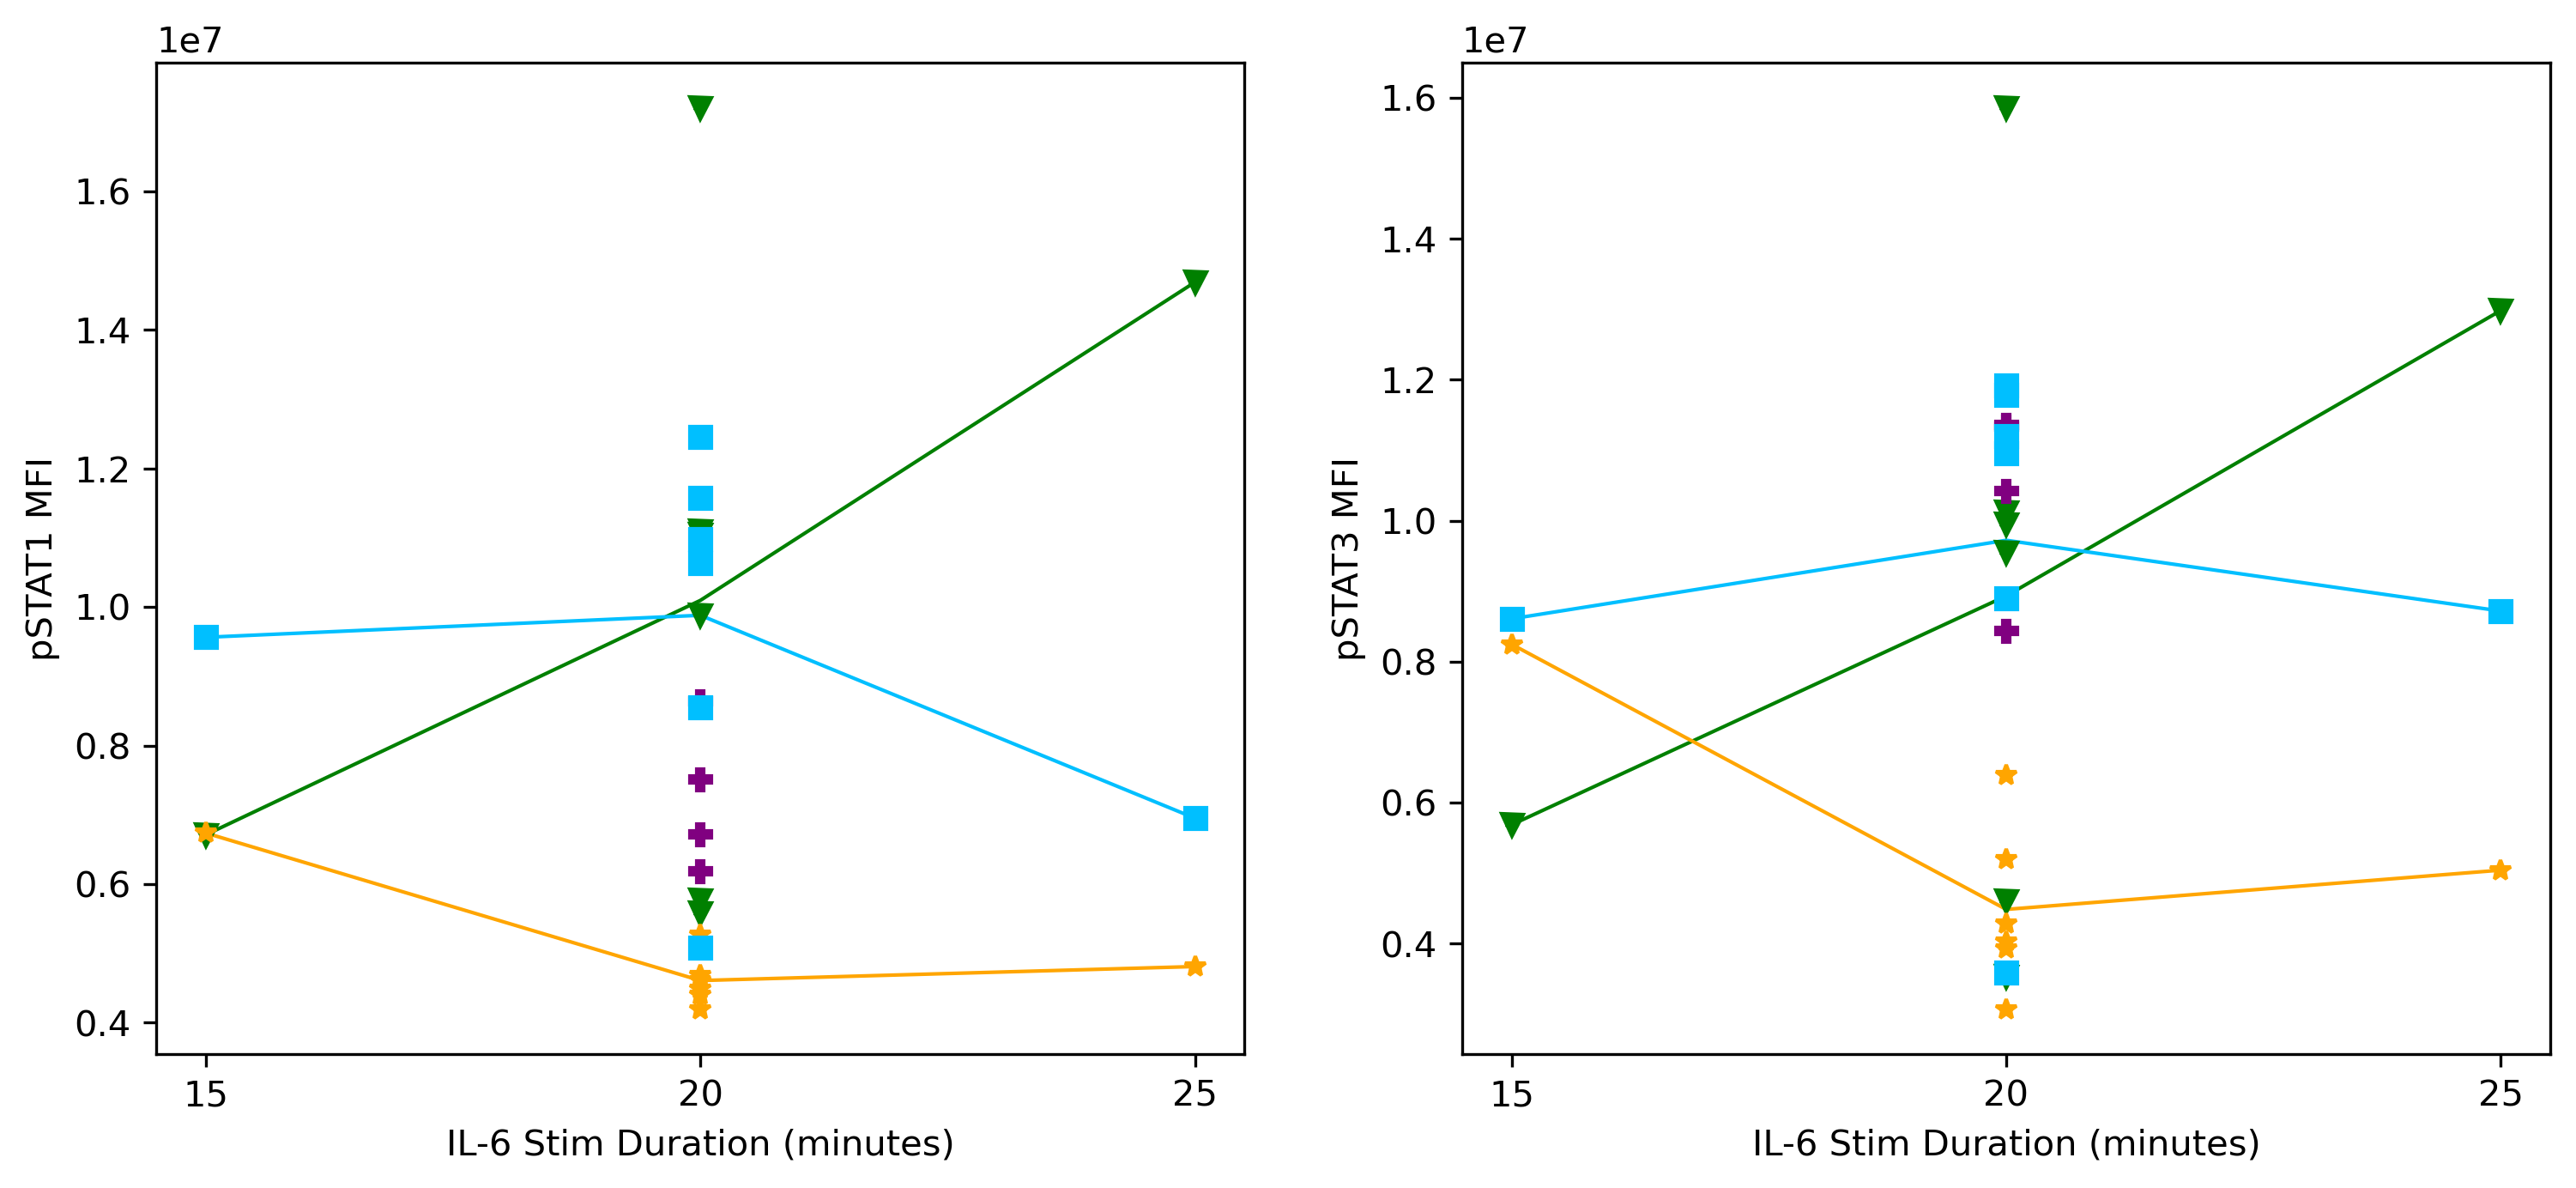

In [73]:
fig1, axs = plt.subplots(1,2, figsize=(12,5), dpi=300)


df = timing_df.copy()
df["STAT1 SEM"] = [0] * len(df)
df["STAT3 SEM"] = [0] * len(df)
for pat in df["PatientId"].unique():
	# Plot tSTATs from first scan
	stat1_ax = axs[0]
	stat3_ax = axs[1]

	cur_df = df.loc[df["PatientId"] == pat]

	stat1_ax.plot(cur_df["IL-6 Stimulation"].unique(), cur_df.groupby("IL-6 Stimulation")["STAT1 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
					lw=1, label=f"{pat} Average")

	stat3_ax.plot(cur_df["IL-6 Stimulation"].unique(), cur_df.groupby("IL-6 Stimulation")["STAT3 Mean"].mean(),
					marker="none", color=patient_to_color[pat], 
					lw=1, label=f"{pat} Average")

	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"]== rep)]
		if select_df.empty:
			continue
		stat1_ax.errorbar(x=select_df["IL-6 Stimulation"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none",
					lw=0.75, label=f"{pat} - {rep}", capsize=2)
		
		stat3_ax.errorbar(x=select_df["IL-6 Stimulation"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none", 
					lw=0.75,  label=f"{pat} - {rep}", capsize=2)
stat1_ax.set_ylabel("pSTAT1 MFI")
stat1_ax.set_xlabel("IL-6 Stim Duration (minutes)")
stat3_ax.set_ylabel("pSTAT3 MFI")
stat3_ax.set_xlabel("IL-6 Stim Duration (minutes)")
stat1_ax.set_xticks(cur_df["IL-6 Stimulation"].unique())
stat3_ax.set_xticks(cur_df["IL-6 Stimulation"].unique());

In [ ]:
full_fname = f"{data_dir}/Well.csv"
df = pd.read_csv(full_fname)
for col in df.columns:
    print(col)
select_cols = ["WellId", "Row", "Column", "ValidObjectCount"]

PlateNumber
WellId
Row
Column
Status
Zposition
Chamber CO2 Percent
Chamber Temperature
ValidObjectCount
SelectedObjectCount
%SelectedObjects
ValidFieldCount
SelectedObjectCountPerValidField
EventType1ObjectCount
%EventType1Objects
EventType2ObjectCount
%EventType2Objects
EventType3ObjectCount
%EventType3Objects
MEAN_ObjectAreaCh1
SD_ObjectAreaCh1
SE_ObjectAreaCh1
CV_ObjectAreaCh1
%HIGH_ObjectAreaCh1
%LOW_ObjectAreaCh1
MEAN_ObjectShapeP2ACh1
SD_ObjectShapeP2ACh1
SE_ObjectShapeP2ACh1
CV_ObjectShapeP2ACh1
%HIGH_ObjectShapeP2ACh1
%LOW_ObjectShapeP2ACh1
MEAN_ObjectShapeLWRCh1
SD_ObjectShapeLWRCh1
SE_ObjectShapeLWRCh1
CV_ObjectShapeLWRCh1
%HIGH_ObjectShapeLWRCh1
%LOW_ObjectShapeLWRCh1
MEAN_ObjectTotalIntenCh1
SD_ObjectTotalIntenCh1
SE_ObjectTotalIntenCh1
CV_ObjectTotalIntenCh1
%HIGH_ObjectTotalIntenCh1
%LOW_ObjectTotalIntenCh1
MEAN_ObjectAvgIntenCh1
SD_ObjectAvgIntenCh1
SE_ObjectAvgIntenCh1
CV_ObjectAvgIntenCh1
%HIGH_ObjectAvgIntenCh1
%LOW_ObjectAvgIntenCh1
MEAN_ObjectVarIntenCh1
SD_ObjectVa